# Car Price Regression

Name: Tan Wen Tao Bryan <br>
Admin No: P2214449 <br>
Class: DAAA/FT/2B/01<br>

-------------------------------------------------------------------------------------------------------------------------------

# Project Objective

- To build a regression model to predict the price of the cars based on a few various factors such as compression ratio and curb weight.

# Index
1.  Exploratory Data Analysis<br>
    1.1 Data Exploration<br>
    1.2 Data Visualisation<br>
2.  Data Cleaning/Feature Engineering<br>
3.  Model Selection<br>
4.  Model Evaluation<br>
5.  Model Improvement<br>
6.  Summary

# References
1. Goyal, S., 2023. Car Prices. [online]. kaggle. Available from: https://www.kaggle.com/datasets/goyalshalini93/car-data/code?datasetId=175168&sortBy=voteCount [Accessed at 2 Nov 2023]
2. Samarins., 2023. What is the difference between OHV, OHC, SOHC and DOHC engines? [online]. Available from: https://www.samarins.com/glossary/dohc.html [Accessed at 4 Nov 2023]
3. Wikipedia., 2023. Toyota L engine. [online]. Available from: https://en.wikipedia.org/wiki/Toyota_L_engine#:~:text=The%20L%20family%20is%20a,conjunction%20with%20a%20SOHC%20head.[Accessed at 4 Nov 2023]
4. sklearn. Plotting Learning Curves and Checking Models'Scalability. [online]. Available at https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285 [Accessed at 4 Nov 2023]
5. Classical ML Equations in LaTeX.[online] GitHub. https://blmoistawinde.github.io/ml_equations_latex/ [Accessed at 4 Nov 2023]
6. Shin, T., 2023. Understanding Feature Importance and How to Implement it in Python. [online]. Medium. Available from: https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285 [Accessed at 4 Nov 2023]
7. Yellowbrick., 2019. Prediction Error Plot. [online]. Available from: https://www.scikit-yb.org/en/latest/api/regressor/peplot.html#:~:text=A%20prediction%20error%20plot%20shows,variance%20is%20in%20the%20model.[Accessed at 4 Nov 2023]
8. Interpreting Residual Plots to Improve Your Regression. [online]. Available from: https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/ [Accessed at 4 Nov 2023]

# Background Info
A Chinese automobile company Teclov_chinese aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Hence, a few factors have to be considered like the brand of the car, the dimensions of the cars, horsepower, engine types, etc.<br>

**The company desires to know:**
- What factors significantly affect the price of the car?
- How accurate are the results and what models were used?

# Importing Libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#sklearn model evaluation
from sklearn.model_selection import(
    cross_validate, StratifiedKFold, RandomizedSearchCV, GridSearchCV, learning_curve
)
from sklearn.metrics import r2_score, mean_squared_error

#sklearn regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor

#IMBlearn libraries
from imblearn.pipeline import Pipeline

import pickle

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
pd.set_option('display.max_columns', None)

carPrice_df = pd.read_csv('../datasets/CarPrice.csv')
display(carPrice_df.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 1.1) Data Exploration

Explore the nature of the dataset can help us gain a better understanding of the characteristics of the dataset

- car_ID: Unique id of each observation
- symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe
- CarName: Name of car company
- fueltype: Car fuel type i.e gas or diesel
- aspiration: Aspiration used in a car
- doornumber: Number of doors in a car
- carbody: Body of the car
- drivewheel: Type of drive wheel
- enginelocation: Location of car engine
- wheelbase: Weelbase of car
- carlength: Length of car
- carwidth: Width of car
- carheight: Height of car
- curbweight: The weight of a car without occupants or baggage.
- enginetype: Type of engine
- cylindernumber: Number of cylinder placed in the car
- enginesize: Size of car
- fuelsystem: Fuel system of car
- boreratio: Boreratio of car
- stroke: Stroke or volume inside the engine
- compressionratio: Compression ratio of car
- horsepower: Power of engine
- peakrpm: Car peak (rpm)
- citympg: Mileage in city
- highwaympg: Mileage on highway
- price: Price of car

### Descriptive Statistics

In [3]:
#Make a copy to prevent mutation
carPrice_ds = carPrice_df.copy()

#Shape of dataset
print(carPrice_ds.shape)

(205, 26)


In [4]:
print(carPrice_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
print(carPrice_ds.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


<b>Observations:</b><br>
- 205 rows and 26 columns<br>
- 10 categorical columns, 16 numerical columns<br>
- All columns has an equal number of observations and no null values so no need for imputation<br>
- car_ID has a unique value for every row so it can be removed later <br>
- price is the target variable as it fulfils the project objective

### Unique Values for Columns with Categorical Data

In [6]:
#cols with categorical data
categorical_col = carPrice_ds.dtypes[carPrice_ds.dtypes=='object']
print(categorical_col)
print()

#prints unique categorical values
for cat_val in categorical_col.index:
    print(f'{cat_val} - {carPrice_ds[cat_val].unique()}')

CarName           object
fueltype          object
aspiration        object
doornumber        object
carbody           object
drivewheel        object
enginelocation    object
enginetype        object
cylindernumber    object
fuelsystem        object
dtype: object

CarName - ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda r

<b>Observations:</b><br>
- All these columns have to be encoded for the features <br>
- Columns like doornumber and cylindernumber <br>
- Too many unique values for CarName as it include the make and the model of the car <br>
- Extract the car brand name out to reduce the number of unique values for analysis

### Data Information

In [7]:
#Descriptive Stats
car_stats=carPrice_ds.describe(include="all").T
car_stats["percentage of most freq val"] = car_stats["freq"]/len(carPrice_ds)*100
display(car_stats)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,percentage of most freq val
car_ID,205.0,NaN,NaN,NaN,103.0,59.322565,1.0,52.0,103.0,154.0,205.0,NaN
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0,NaN
CarName,205,147,toyota corona,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.926829
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.243902
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.95122
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.097561
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.829268
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.536585
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.536585
wheelbase,205.0,NaN,NaN,NaN,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9,NaN


<b>Observations:</b><br>
- Dataset has the most amount cars that uses gas as fuel type, about 90.2% of the dataset<br>
- Dataset has the most amount of cars that have their engine located at the front, about 98.5% of the dataset<br>
- Dataset has the most amount of cars with std as their aspiration, about 81.95% of the dataset.

### Target Variable

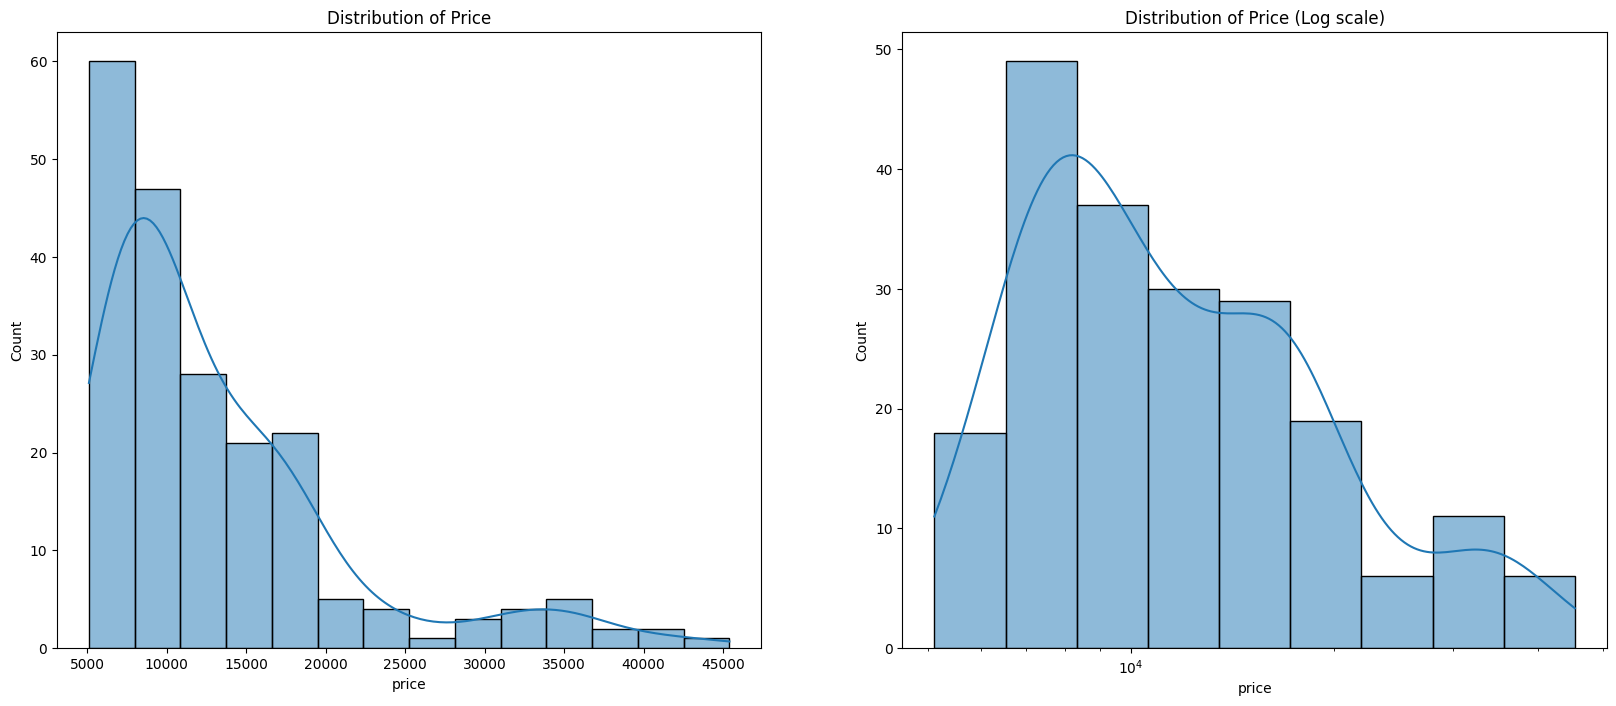

In [8]:
#plot a histograph to show distribution of target variable (price)
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.histplot(data=carPrice_ds, x="price", kde=True, ax=ax[0])
ax[0].set_title("Distribution of Price")
sns.histplot(data=carPrice_ds, x="price", kde=True, log_scale=True, ax=ax[1])
ax[1].set_title("Distribution of Price (Log scale)")
plt.show()

<b>Observations:</b><br>
- Histogram shows that the distribution of housing prices in the US is positively skewed, mostly costing between $5000 & $8000, suggesting that most cars in the dataset are low<br>
- Using a log transformation still makes the data very skewed <br>
- Shows that the cars price does not follow a normal distribution

In [9]:
print(carPrice_ds["price"].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


**Observation**
- The prices data are far spread out from the mean, showing a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18500 and 45400.)

# 1.2) Data Visualisation
- Part of Data Exploration
- Before visualising the data, we are going to extract the brand name from car name as well as convert some of the categorical variables like doornumber and cylindernumber to discrete

In [10]:
# Extract the brand names from the car names
carPrice_ds["CarName"] = carPrice_ds["CarName"].str.split(" ").str.get(0)

In [11]:
# Convert the categorical variables to discrete variables
carPrice_ds["doornumber"] = carPrice_ds["doornumber"].map({"two": 2, "four": 4})
carPrice_ds["cylindernumber"] = carPrice_ds["cylindernumber"].map({"four": 4, "six": 6, "five": 5, "three": 3, "twelve":12 , "two":2, "eight": 8})

In [12]:
display(carPrice_ds.head())

# Check unique values for the columns that we have changed
for cat_val in ["CarName","doornumber", "cylindernumber"]:
    print(f'{cat_val} - {carPrice_ds[cat_val].unique()}')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


CarName - ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
doornumber - [2 4]
cylindernumber - [ 4  6  5  3 12  2  8]


<b>Observations:</b><br>
- Car Names still have some interior cleaning to be done, ex. toyouta should be toyota

In [13]:
# Quick cleaning of the car name values for better EDA
carPrice_ds["CarName"] = carPrice_ds["CarName"].str.replace("toyouta", "toyota")
carPrice_ds["CarName"] = carPrice_ds["CarName"].str.replace("porcshce", "porsche")
carPrice_ds["CarName"] = carPrice_ds["CarName"].str.replace("vw", "volkswagen")
carPrice_ds["CarName"] = carPrice_ds["CarName"].str.replace("vokswagen", "volkswagen")
carPrice_ds["CarName"] = carPrice_ds["CarName"].str.replace("Nissan", "nissan")
carPrice_ds["CarName"] = carPrice_ds["CarName"].str.replace("maxda", "mazda")
carPrice_ds["CarName"] = carPrice_ds["CarName"].str.replace("alfa-romero", "alfa-romeo")

In [14]:
print(carPrice_ds["CarName"].unique())

['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


### <u>Continuous Variables (Distribution)</u>

- Check Distibution of Variables ex. wheelbase, carlength, compressionratio

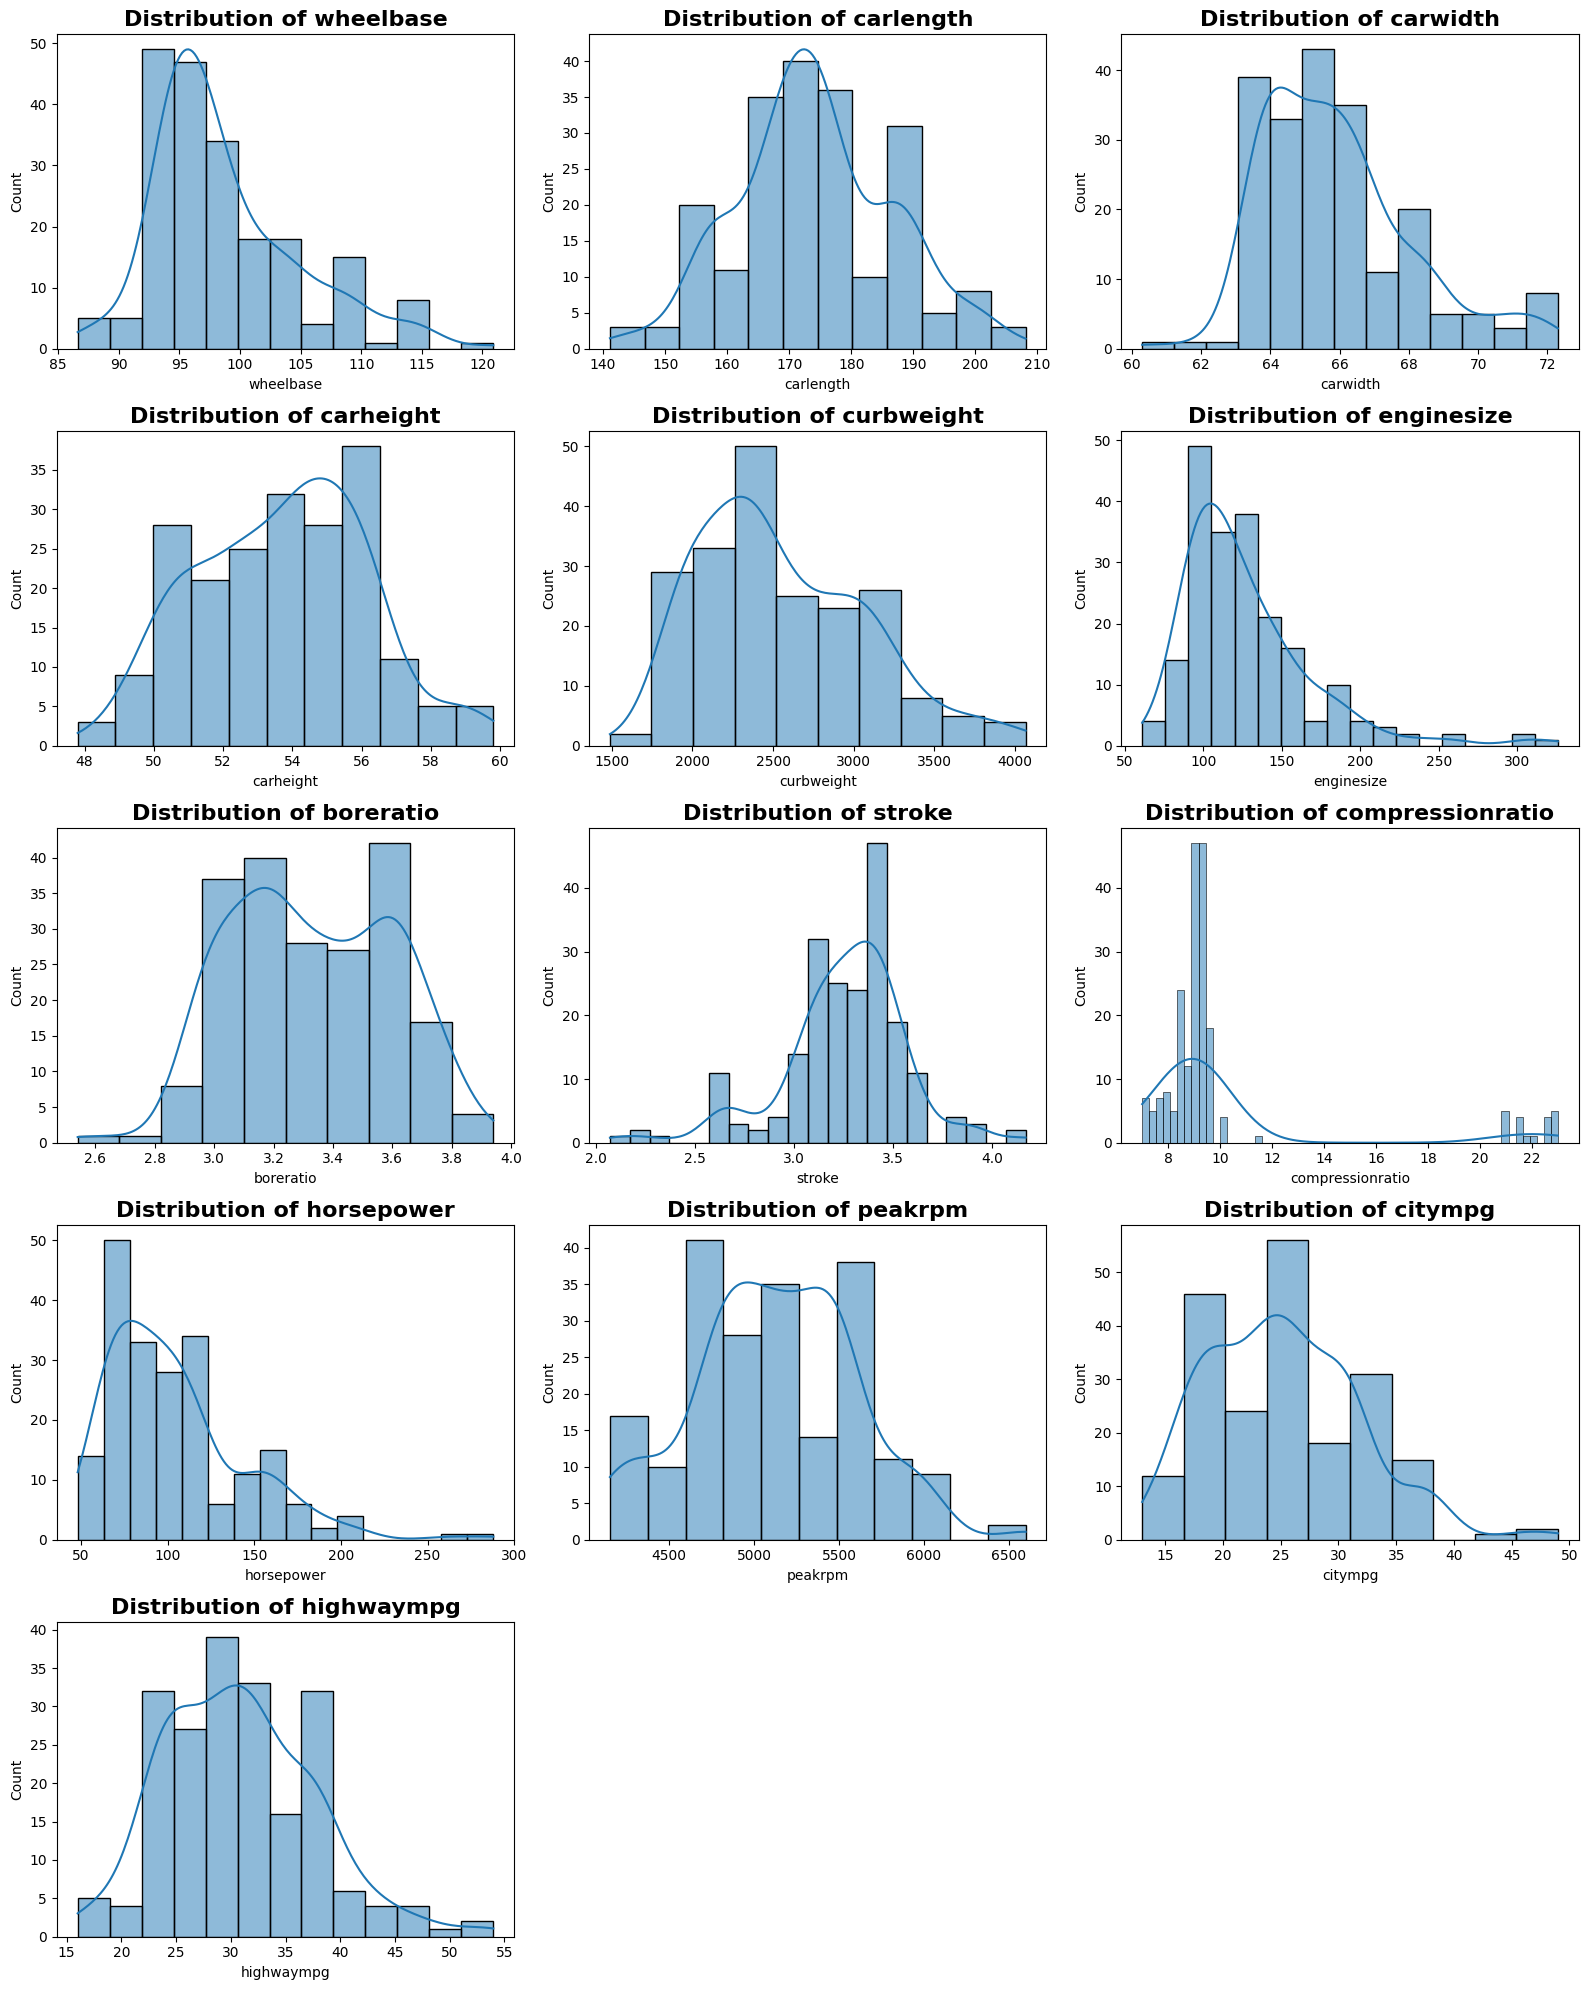

In [15]:
# Continuous variables
continuous_columns = [
    "wheelbase", "carlength","carwidth","carheight","curbweight","enginesize","boreratio",
    'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'
    ]

# Set the number of subplots, rows and columns
num_subplots = len(continuous_columns)
num_cols = 3
num_rows = (num_subplots + num_cols - 1)//num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

# Plot the distribution using seaborn histplot
for i, var in enumerate(continuous_columns):
    row = i//num_cols
    col = i%num_cols
    ax = axes[row, col]

    sns.histplot(data = carPrice_ds, x=var, kde=True, ax=ax)
    ax.set_title(f"Distribution of {var}", fontsize=16, fontweight="bold")
    ax.set_xlabel(var)

# Remove any empty subplots if the number of subplots do not fit
if num_subplots < num_rows * num_cols:
    for i in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

fig.tight_layout()
plt.show()

<b>Observations:</b><br>
- Variables like wheelbase, carwidth, curbweight, enginesize, compressionratio, horsepower, peakrpm and citympg are positively skewed while variables like stroke are negatively skewed. 
- Only these few variables are normally distributed, carlength, carheight, highwaympg are normally distributed.
- Boreratio has a bimodal distribution where the two peak ranges over the values of 3.0-3.2 and 3.5-3.7.

### <u>Discrete Variables (Distribution)</u>
- Use boxplot to plot the median and distribution of the different variables such as symboling and door number.

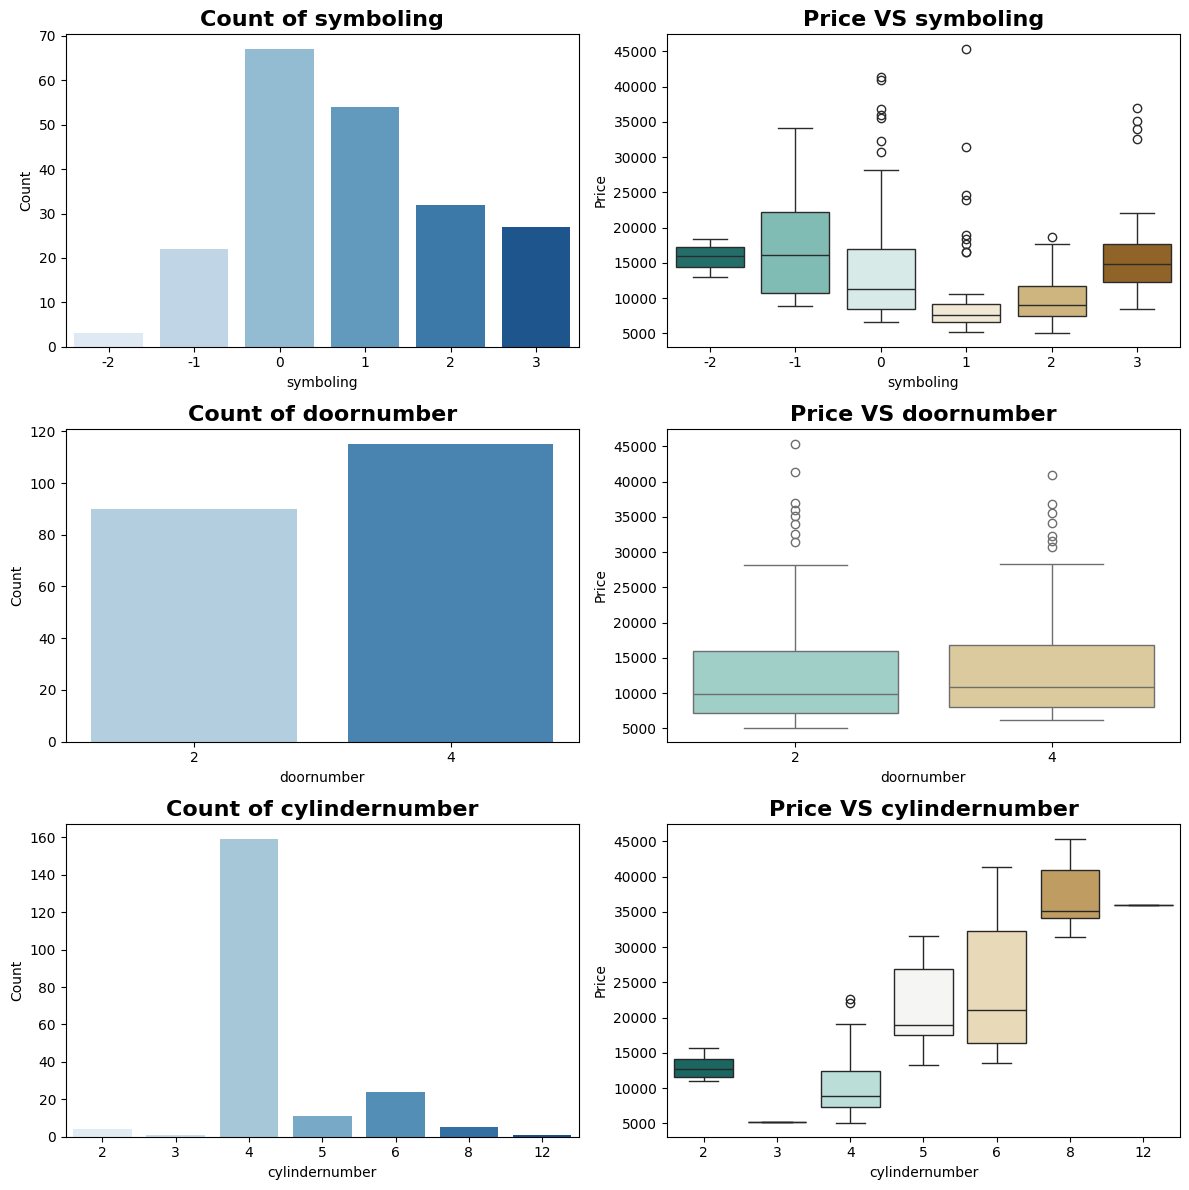

In [16]:
# Discrete variables
discrete_columns = ["symboling", "doornumber", "cylindernumber"]

# Set the number of subplots, rows and columns
num_subplots = len(discrete_columns)
num_cols = 2
num_rows = num_subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Plot countplot the count frequency of cars sold based on that variable
for i, var in enumerate(discrete_columns):
    col = 0
    ax =axes[i, col]

    sns.countplot(data=carPrice_ds, x=var, ax=ax, palette = "Blues")
    ax.set_title(f"Count of {var}", fontsize=16, fontweight="bold")
    ax.set_xlabel(var)
    ax.set_ylabel("Count")

# Plot boxplot to show distribution of price based on that variable
for i, var in enumerate(discrete_columns):
    col = 1
    ax =axes[i, col]

    sns.boxplot(data = carPrice_ds, x=var, y="price", ax=ax, palette='BrBG_r')
    ax.set_title(f"Price VS {var}", fontsize=16, fontweight="bold")
    ax.set_xlabel(var)
    ax.set_ylabel("Price")

fig.tight_layout()
plt.show()

**Observations:**

**Symboling**
- Cars with symboling of 0 and 1 have the most sold but they are also the least expensive.
- Symboling with 3 value has the price range similar to -2 and -1 value while a dip in car price at symboling 1.
- Overall, cars with symboling of negative values and symboling of 3 have a higher car price than cars with other symboling.

**Doornumber**
- Generally, cars that have 2 and 4 doors are sold at the same price, and are not really affecting the price.

**Cylindernumber**
- Overall, the greater the cylindernumber, the higher the car price with the exception of 2 cylinder number.
- Cars with 4 cylinders are generally sold the most.

In [17]:
# Display the row that has 3 & 12 cylindernumbers
display(carPrice_ds[carPrice_ds["cylindernumber"]==3])
display(carPrice_ds[carPrice_ds["cylindernumber"]==12])

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,3,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar,gas,std,2,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,12,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


**Observations:**
- We have to remove these two rows as there are only 1 row of data that contains 3 & 12 cylinder number so this will not mess with the training of data.

### <u>Categorical Variables (Frequency)</u>
- Comparing the prices of cars over the different categories in different variables

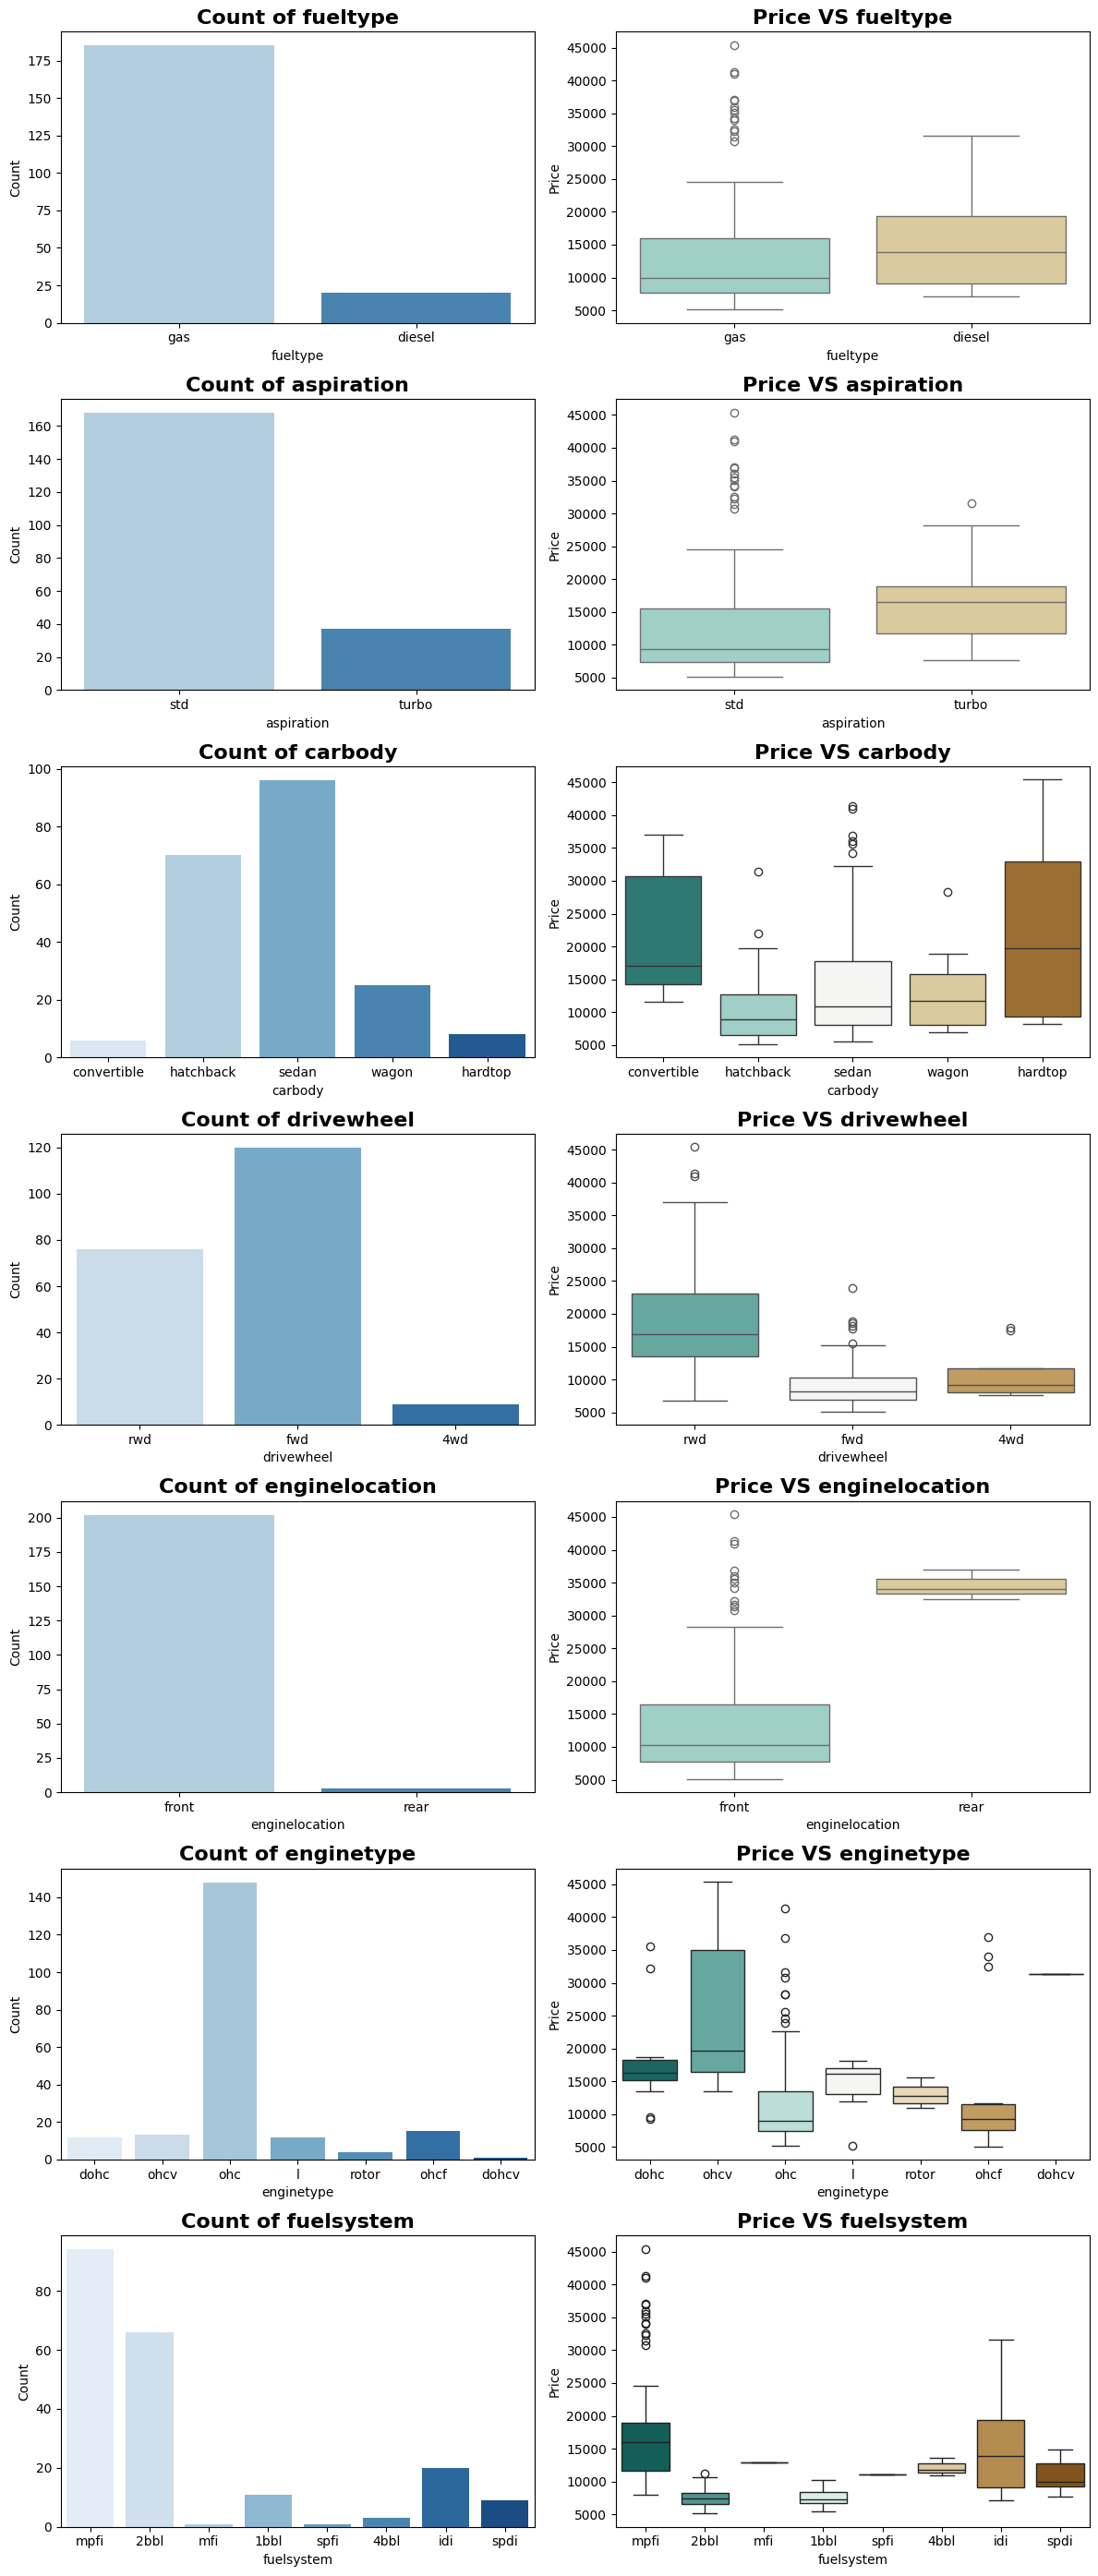

In [18]:
# Categorical variables
categorical_columns = ["fueltype", "aspiration", "carbody", "drivewheel", "enginelocation", "enginetype", "fuelsystem"]

# Set the number of subplots, rows and columns
num_subplots = len(categorical_columns)
num_cols = 2
num_rows = num_subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Plot countplot the count frequency of cars sold based on that variable
for i, var in enumerate(categorical_columns):
    col = 0
    ax =axes[i, col]

    sns.countplot(data=carPrice_ds, x=var, ax=ax, palette = "Blues")
    ax.set_title(f"Count of {var}", fontsize=16, fontweight="bold")
    ax.set_xlabel(var)
    ax.set_ylabel("Count")

# Plot boxplot to show distribution of price based on that variable
for i, var in enumerate(categorical_columns):
    col = 1
    ax =axes[i, col]

    sns.boxplot(data = carPrice_ds, x=var, y="price", ax=ax, palette='BrBG_r')
    ax.set_title(f"Price VS {var}", fontsize=16, fontweight="bold")
    ax.set_xlabel(var)
    ax.set_ylabel("Price")

fig.tight_layout()
plt.show()

**Observations:**

**Fuel Types**
- Cars using diesel are slightly more expensive than cars using gas.
- Cars with gas are sold more frequently compared to diesel.

**Aspiration**
- For aspiration, cars with turbo are generally more expensive than cars with std, with a few outliers.

**Carbody**
- For carbody, cars that are convertible and hardtop are more expensive than the other cars.
- Sedan is the most preferable car body.

**Drivewheel**
- For drivewheel, cars with rwd drive wheel (rear wheel drive) are more expensive than the other cars with other drivewheel.

**Enginelocation**
- For enginelocation, cars with rear enginelocation are more expensive than cars with front enginelocation.

**Enginetypes**
- For enginetypes, cars with ohcv have the highest car price range while ohc and ohcf have the lowest car price range.
- Cars with ohc engines are the most frequently sold.

**Fuelsystem**
- For fuelsystem, cars with 2bb1 and 1bbl have lower car prices than the other fuel systems, while cars with mpfi have the highest car prices.

In [19]:
# Retrieve row with dohcv engine type
display(carPrice_ds[carPrice_ds["enginetype"]=="dohcv"])

# Retrieve row with mfi & spfi fuel system
display(carPrice_ds[carPrice_ds["fuelsystem"]=="mfi"])
display(carPrice_ds[carPrice_ds["fuelsystem"]=="spfi"])

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,130,1,porsche,gas,std,2,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,8,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge,gas,turbo,2,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,4,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
46,47,2,isuzu,gas,std,2,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,4,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


**Observations:**
- We have to remove these rows as there are only 1 row of data that contains the dohcv enginetype and mfi, spfi fuelsystem so this will not mess with the training of data.

#### Car Brands (Names)

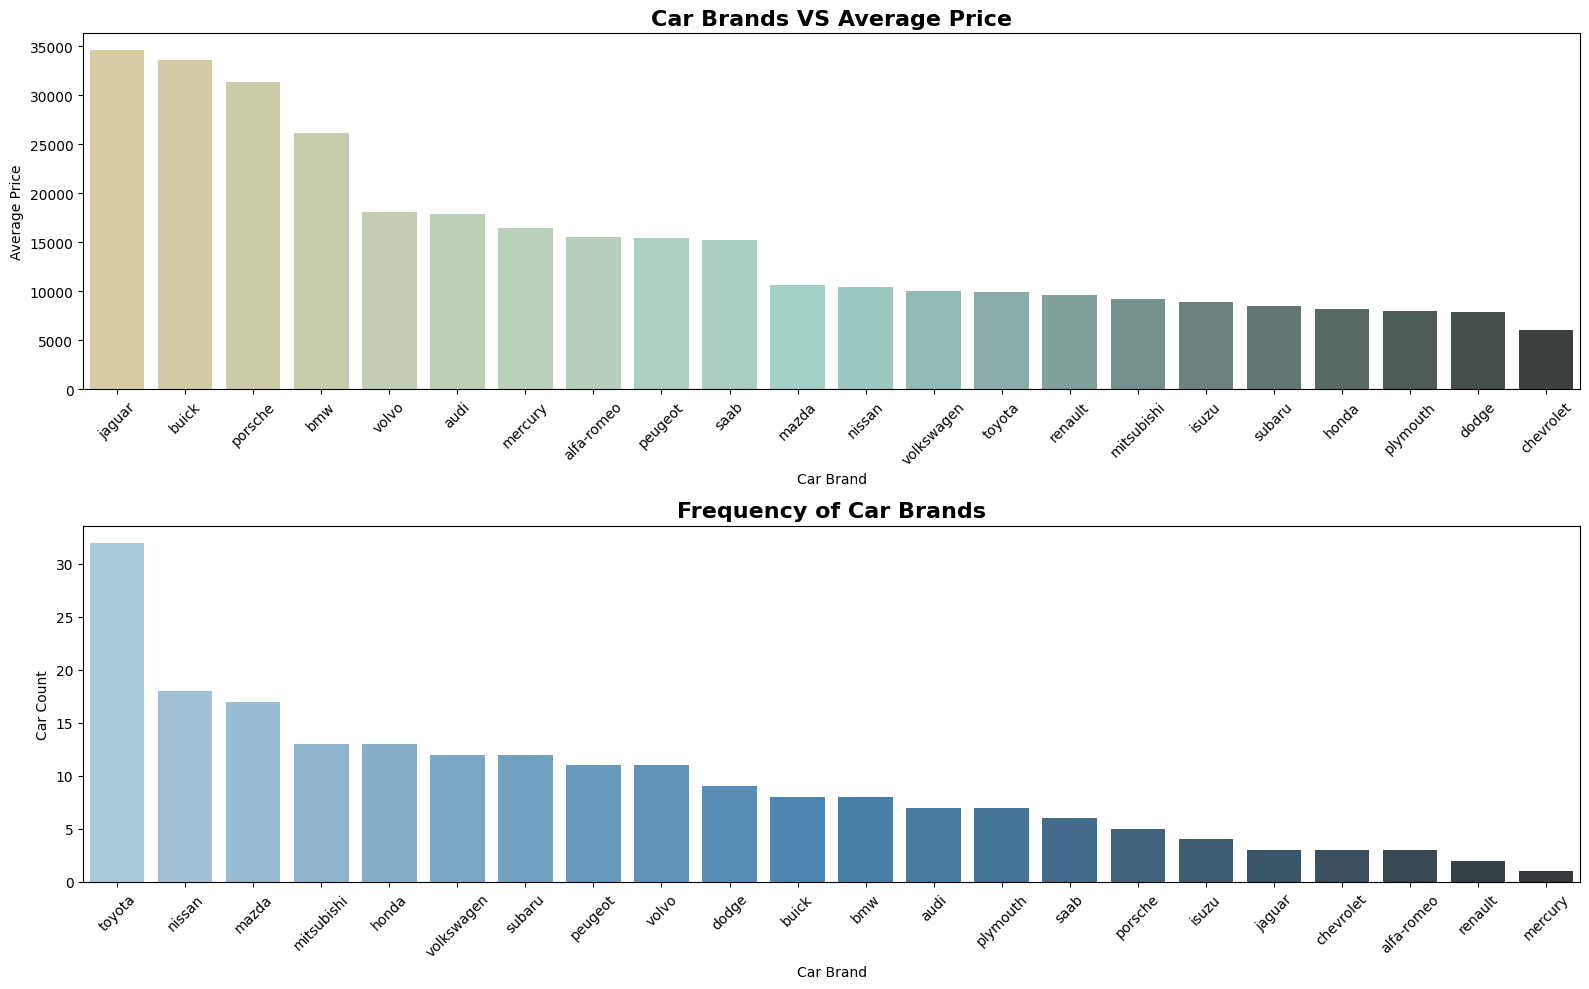

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Car brand name VS Average price of the car
avg_price_df = pd.DataFrame(carPrice_ds.groupby(["CarName"])['price'].mean().sort_values(ascending=False))
sns.barplot(x=avg_price_df.index, y=avg_price_df.values.ravel(), ax=axes[0], palette="BrBG_d")
axes[0].set_title("Car Brands VS Average Price", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Car Brand")
axes[0].set_ylabel("Average Price")


# Car brand name VS count frequency of cars
car_brand_count = carPrice_ds["CarName"].value_counts()
sns.barplot(x=car_brand_count.index, y=car_brand_count.values.ravel(), ax=axes[1], palette="Blues_d")
axes[1].set_title("Frequency of Car Brands", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Car Brand")
axes[1].set_ylabel("Car Count")

# Rotate the x-axis labels
for ax in axes:
    ax.tick_params(axis='x', rotation = 45)

plt.tight_layout()
plt.show()

**Observations:**

- Jaguar and Buick has the highest average price while Chevrolet has the lowest average price.
- Toyota seems to be the most popular car to be bought while Mercury is least bought as Mercury is a classic car and is no longer being sold.

### <u>Bivariate Relationship</u>
- Compare the relationship between every two numerical variables in the dataset

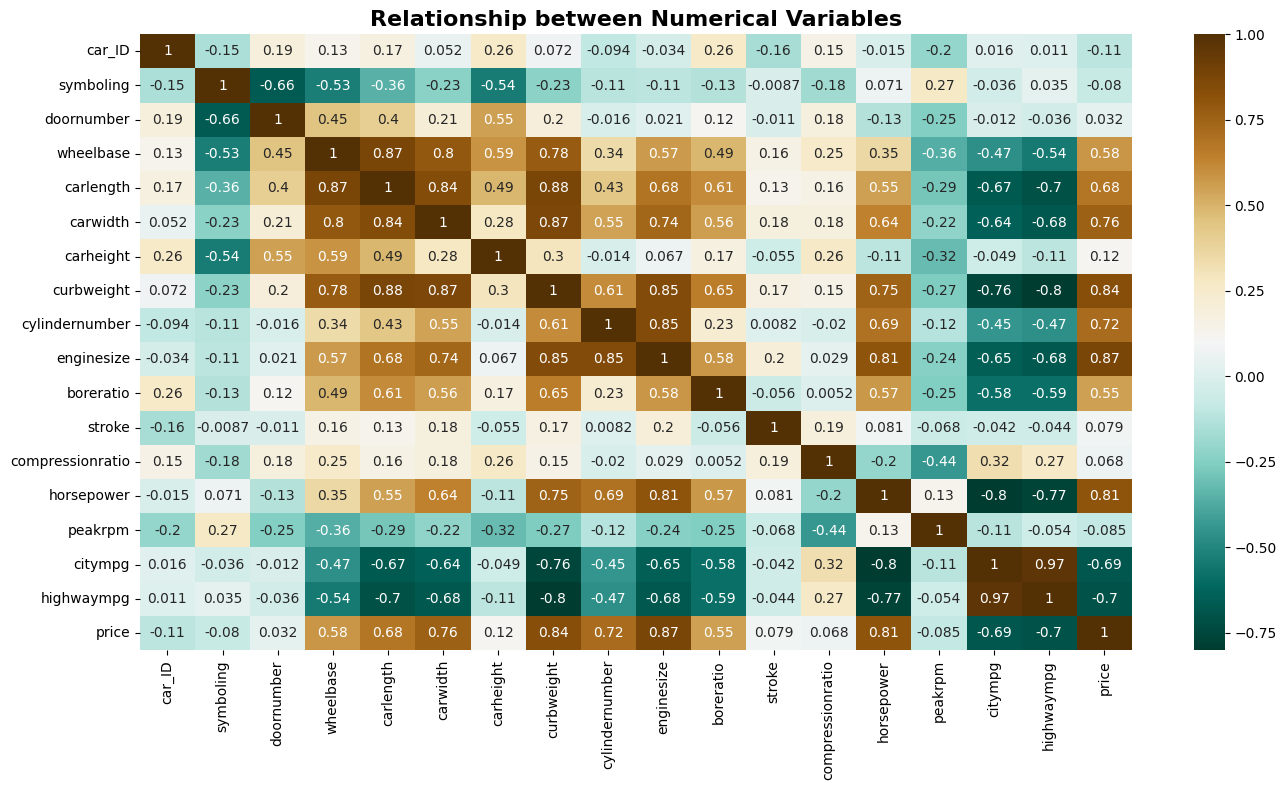

In [21]:
# Retrieve all the numerical columns
numerical_col = carPrice_ds.dtypes[carPrice_ds.dtypes!='object'].index

plt.figure(figsize=(16, 8))
sns.heatmap(carPrice_ds[numerical_col].corr(), annot=True, cmap="BrBG_r")
plt.title("Relationship between Numerical Variables", fontsize=16, fontweight="bold")
plt.show()

**Observations:**
- Curb weight, cylindernumber, enginesize, carwidth and horsepower seems to have a strong postive association with price.
- Citympg and highwaympg seems to have a strong negative association with price.
- Enginesize seems to have a strong positive association to horsepower.
- Curbweight, cylindernumber and horsepower have a strong positive association to enginesize
- Car length and car width have a strong positive association with curb weight
- Car length, car weight and curbweight have a strong positive association with wheelbase.
- Car length is also strongly postively correlated to car width.

# 2) Data Cleaning/Feature Engineering

### <u>Drop Unwanted Columns</u>
- Drop car_ID as it is unique for every row

In [22]:
carPrice_df.drop("car_ID", axis=1, inplace=True)
display(carPrice_df.head())

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### <u>Car Brand</u>
- Extract the car brand out from car name and models
- Ensure consistent spelling of the car brands

In [23]:
# Extract the brand names from the car names
carPrice_df["CarName"] = carPrice_df["CarName"].str.split(" ").str.get(0)

# Change in the car brand names to make naming convention consistent
carPrice_df["CarName"] = carPrice_df["CarName"].str.replace("toyouta", "toyota")
carPrice_df["CarName"] = carPrice_df["CarName"].str.replace("porcshce", "porsche")
carPrice_df["CarName"] = carPrice_df["CarName"].str.replace("vw", "volkswagen")
carPrice_df["CarName"] = carPrice_df["CarName"].str.replace("vokswagen", "volkswagen")
carPrice_df["CarName"] = carPrice_df["CarName"].str.replace("Nissan", "nissan")
carPrice_df["CarName"] = carPrice_df["CarName"].str.replace("maxda", "mazda")
carPrice_df["CarName"] = carPrice_df["CarName"].str.replace("alfa-romero", "alfa-romeo")

print(carPrice_df["CarName"].unique())

['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


### <u>Feature Engineering</u>
- Engineer new features to train the model to explain new patterns

#### Fuel Economy
- Measures how efficient a vehicle converts fuel into useful work
- Used a weighted average formula based on city and highway miles per gallons
    $$ Fuel Economy = (\text{citympg} \times 0.55) + (\text{highwaympg} \times 0.45) $$

In [24]:
# Adds new column to the dataset
carPrice_df["fueleconomy"] = (0.55 * carPrice_df["citympg"]) + (0.45 * carPrice_df["highwaympg"])
display(carPrice_df.head())

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


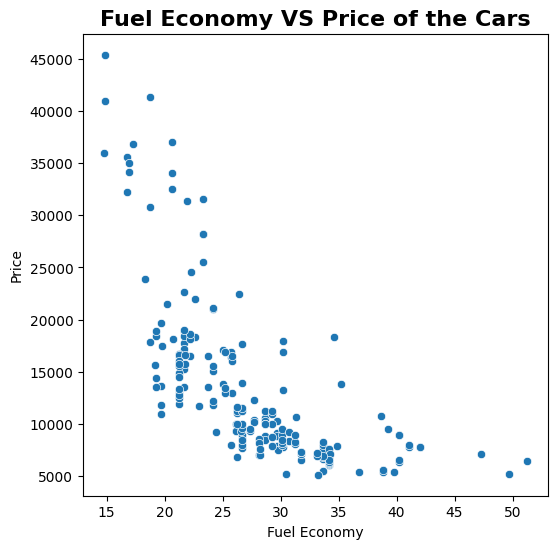

r=-0.70


In [25]:
# Plot a scatterplot to show the relationship between fuel economy and price
plt.figure(figsize=(6,6))

sns.scatterplot(data=carPrice_df, x="fueleconomy", y="price")
plt.title("Fuel Economy VS Price of the Cars", fontsize=16, fontweight="bold")
plt.xlabel("Fuel Economy")
plt.ylabel("Price")
plt.show()

# Show the correlation coefficient between fuel economy and price
correlation_coeff = carPrice_df["fueleconomy"].corr(carPrice_df["price"])
print(f"r={correlation_coeff:.2f}")

**Observations:**
- Fuel economy has a significant negative correlation to the price of the cars, r=-0.70.
- This means that when the cheaper cars are generally more efficient at saving fuels, becoming more fuel-efficient.

### Binning Average Price
- The price of the cars are binned into these 3 columns based on what is the car company

In [26]:
# Create a copy of the dataset
car_temp = carPrice_df.copy()
car_temp["price"] = car_temp["price"].astype("int")

# Group the data by car name and calculate the average price
table = car_temp.groupby(['CarName'])['price'].mean()

# Merge the average price with the original dataset
car_temp = car_temp.merge(table.reset_index(), how='left',on='CarName')

# Construct the bins based on the descriptive stats of the price
bins = [0,10000,20000,40000]
car_price_bin=['Budget Price','Medium Price','Highend Price']

#Segment the price into bins
carPrice_df['carsprice_range'] = pd.cut(car_temp['price_y'], bins, right=False, labels=car_price_bin)
carPrice_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsprice_range
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,Medium Price
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,Medium Price
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,Medium Price
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,Medium Price
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,Medium Price


### <u>Feature Selection</u>
- Reducing the number of input variables to train the model
- Variables I have selected based on EDA:
    - Fuel Economy
    - Fuel Type
    - Aspiration
    - Carbody
    - Drivewheel
    - Engine Type
    - Wheelbase
    - Car Length
    - Car Width
    - Curb Weight
    - Cylinder Number
    - Engine Size
    - Bore Ratio
    - Horsepower

In [27]:
# Create a copy of the dataset to build the model
carPrice_model = carPrice_df.copy()

# Columns that plays a significant relationship with price of the car
carPrice_model = carPrice_model[['price', 'fueleconomy', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
                                 'horsepower', 'wheelbase', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'carsprice_range']]

display(carPrice_model.head())

,price,fueleconomy,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,wheelbase,aspiration,carbody,drivewheel,enginetype,carsprice_range
0,13495.0,23.70,168.8,64.1,2548,four,130,3.47,111,88.6,std,convertible,rwd,dohc,Medium Price
1,16500.0,23.70,168.8,64.1,2548,four,130,3.47,111,88.6,std,convertible,rwd,dohc,Medium Price
2,16500.0,22.15,171.2,65.5,2823,six,152,2.68,154,94.5,std,hatchback,rwd,ohcv,Medium Price
3,13950.0,26.70,176.6,66.2,2337,four,109,3.19,102,99.8,std,sedan,fwd,ohc,Medium Price
4,17450.0,19.80,176.6,66.4,2824,five,136,3.19,115,99.4,std,sedan,4wd,ohc,Medium Price


In [28]:
# Remove the row with enginetype that is dohcv
carPrice_model.drop(carPrice_model[carPrice_model["enginetype"]=="dohcv"].index, inplace=True)

# Remove the rows with cylindernumber that is 3 & 12
carPrice_model.drop(carPrice_model[carPrice_model["cylindernumber"]==3].index, inplace=True)
carPrice_model.drop(carPrice_model[carPrice_model["cylindernumber"]==12].index, inplace=True)

### Check for Duplicates
- Drop the carID, and drop duplicated rows without the test column to not mess up the data when model fitting

In [29]:
#Remove the carPrice column temporarily to check duplicates in traning data
carPrice_df_temp = carPrice_model.drop(columns=["price"])
#Check for duplicates
print(f'Duplicates: {carPrice_df_temp.duplicated().sum()}')

#Get index of rows that have duplicates
duplicate_index = carPrice_df_temp[carPrice_df_temp.duplicated()].index

#Prints duplicated rows
display(carPrice_df_temp[carPrice_df_temp.duplicated()])

#Drop the duplicates
carPrice_model = carPrice_model.drop(index=duplicate_index)

Duplicates: 11


,fueleconomy,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,wheelbase,aspiration,carbody,drivewheel,enginetype,carsprice_range
1,23.70,168.8,64.1,2548,four,130,3.47,111,88.6,std,convertible,rwd,dohc,Medium Price
11,25.70,176.8,64.8,2395,four,108,3.50,101,101.2,std,sedan,rwd,ohc,Highend Price
26,34.15,157.3,63.8,1989,four,90,2.97,68,93.7,std,sedan,fwd,ohc,Budget Price
48,16.80,199.6,69.6,4066,six,258,3.63,176,113.0,std,sedan,rwd,dohc,Highend Price
56,19.70,169.0,65.7,2380,two,70,3.33,101,95.3,std,hatchback,rwd,rotor,Medium Price
61,28.70,177.8,66.5,2385,four,122,3.39,84,98.8,std,hatchback,fwd,ohc,Medium Price
62,28.70,177.8,66.5,2410,four,122,3.39,84,98.8,std,sedan,fwd,ohc,Medium Price
116,30.25,186.7,68.4,3252,four,152,3.70,95,107.9,turbo,sedan,rwd,l,Medium Price
119,26.70,157.3,63.8,2128,four,98,3.03,102,93.7,turbo,hatchback,fwd,ohc,Budget Price
120,34.15,157.3,63.8,1967,four,90,2.97,68,93.7,std,hatchback,fwd,ohc,Budget Price


### <u>Separate Features & Target labels</u>

In [30]:
X, y = carPrice_model.drop("price", axis = 1), carPrice_model["price"]

### <u>Split Testing & Training data</u>
- Split data 80/20 training/testing data to train and test the model

In [31]:
#Split test and training data for features and target label
#random_state sets a seed to the random generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)

print(X_train.isna().sum())

(154, 14)
(39, 14)
fueleconomy        0
carlength          0
carwidth           0
curbweight         0
cylindernumber     0
enginesize         0
boreratio          0
horsepower         0
wheelbase          0
aspiration         0
carbody            0
drivewheel         0
enginetype         0
carsprice_range    0
dtype: int64


In [32]:
# Create a copy of the training data to demonstrate the encodings
X_train_copy = X_train.copy()

### <u>Categorical Encoding</u>
- Needs to encode categorical data as numerical data so that the data can be processed by the model

#### One-Hot Encoding
- Used for aspiration, carbody, drivewheel and enginetype column
- Meant for nominal data

In [33]:
#Encode for aspiration, carbody, drivewheel and enginetype columns
enc1 = OneHotEncoder()
col=['aspiration', 'carbody', 'drivewheel', 'enginetype']
enc1.fit(X_train_copy[col])

X_train_copy=pd.concat([
    X_train_copy.drop(col, axis=1).reset_index(drop=True), 
    pd.DataFrame(
        enc1.transform(X_train_copy[col]).toarray(),
        columns=enc1.get_feature_names_out()
    )
], axis=1)

display(X_train_copy.head())

,fueleconomy,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,wheelbase,carsprice_range,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,33.70,165.3,63.8,1889,four,97,3.15,69,94.5,Medium Price,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20.70,186.7,68.3,3130,four,134,3.61,142,108.0,Medium Price,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,29.25,175.6,66.5,2414,four,122,3.31,92,102.4,Budget Price,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,29.70,167.5,65.2,2289,four,110,3.15,86,96.5,Budget Price,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,25.70,173.6,65.4,2420,four,108,3.62,82,96.9,Budget Price,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Ordinal Encoding
- Used for cylindernumber and carprice range columns
- Meant for ordinal data

In [34]:
#Encode for cylindernumber column
enc2 = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, categories=[['two','three','four','five','six','eight','twelve']])
X_train_copy[["cylindernumber"]] = enc2.fit_transform(X_train_copy[["cylindernumber"]])

#Encode for carprice_range column
enc3 = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, categories=[['Budget Price','Medium Price','Highend Price']])
X_train_copy[["carsprice_range"]] = enc3.fit_transform(X_train_copy[["carsprice_range"]])
display(X_train_copy.head())

,fueleconomy,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,wheelbase,carsprice_range,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,33.70,165.3,63.8,1889,2.0,97,3.15,69,94.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20.70,186.7,68.3,3130,2.0,134,3.61,142,108.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,29.25,175.6,66.5,2414,2.0,122,3.31,92,102.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,29.70,167.5,65.2,2289,2.0,110,3.15,86,96.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,25.70,173.6,65.4,2420,2.0,108,3.62,82,96.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### <u>Standardization</u>
- Using StandardScaler to standardise the scale of the data so that the mean=0 and standard deviation=1 makes data consistent for model to use

In [35]:
num_cols = ['fueleconomy', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'wheelbase']

X_train_copy[num_cols]=StandardScaler().fit_transform(X_train_copy[num_cols])
display(X_train_copy.head())

,fueleconomy,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,wheelbase,carsprice_range,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.881382,-0.734978,-1.066436,-1.314831,2.0,-0.799889,-0.637045,-0.943980,-0.755624,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.135681,1.031886,1.300007,1.229778,2.0,0.347585,1.116872,1.253622,1.549838,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.190926,0.115428,0.353430,-0.238345,2.0,-0.024569,-0.026987,-0.251585,0.593498,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.260747,-0.553338,-0.330209,-0.494651,2.0,-0.396722,-0.637045,-0.432209,-0.414074,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.359888,-0.049699,-0.225034,-0.226042,2.0,-0.458748,1.155000,-0.552626,-0.345764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### <u>Pipeline</u>
- To link the steps of data engineering and the model implementation together

In [36]:
#Categorical transformer (OneHotEncode + OrdinalEncode)
categoricalTransformer = ColumnTransformer(
    [
        ('oneHotEnc', OneHotEncoder(categories='auto', sparse_output=False), ['aspiration', 'carbody', 'drivewheel', 'enginetype']),
        ('ordinalEnc', OrdinalEncoder(categories=[['two','three','four','five','six','eight','twelve']]), ["cylindernumber"]),
        ('ordinalEnc2', OrdinalEncoder(categories=[['Budget Price','Medium Price','Highend Price']]), ["carsprice_range"])
    ],
    remainder='passthrough'
)

#Numerical transformer
num_cols = ['fueleconomy', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'wheelbase']
numericalTransformer = ColumnTransformer([
    ("standardise", StandardScaler(), num_cols)
],
remainder="passthrough")

#Combining two transformers into preprocessor
preprocessor=ColumnTransformer([
    ("categorical", categoricalTransformer, ['aspiration', 'carbody', 'drivewheel', 'enginetype', "cylindernumber","carsprice_range"]),
    ("numerical", numericalTransformer, num_cols)
],
remainder="passthrough")

#Building the steps
steps = [
    ("preprocessing", preprocessor),
    ("model")
]

model_step=len(steps)-1

# 3) Model Selection

### <u>Model Selection</u>
Here are some reasons and benefits of why I have selected these models for regression.

<b><u>Linear Regression</u></b><br>
- Fits a line to the data set <br>
- Able to predict the price of the cars by matching the equation of the line <br>
    
<b><u>AdaBoost Regressor</u></b><br>
- Ensemble learning method that combines multiple weak learners sequentially to create a strong predictive model<br>
- Uses a linear loss function for regression <br>
- Uses simple weak learners <br>
    
<b><u>Gradient Boosting Regressor</u></b><br>
- Ensemble learning method that combines multiple weak or base learners in a stage wise function where each learner is trained to minimise the errors of the previous model <br>
- Uses mean squarred error (MSE) function for regression <br>
- Uses more complex weak learners <br>

<b><u>Random Forest Regressor</u></b><br>
- Make use of bagging where the output of each decision tree averaged to make the final prediction <br>
- Can capture non linear relationships between input features and target feature <br>
- Reduces risk of overfitting <br>
- Robust to noisy data, irrelevant features <br>

<b><u>KNN</u></b><br>
- Uses the value of the nearest data points to find the closest data points in training set<br>
- Prediction for the test point is the average of the other data points <br>

<b><u>Decision Tree Regressor</u></b><br>
- Subdivide the feature space into regions of constant value<br>
- Average of the decision tree reduces risk of overfitting <br>

<b><u>Ridge</u></b><br>
- Adds "squared magnitude" of coefficient as penalty term to the loss function <br>
- If lambda is very large, it will add too much weight and result in underfitting

    $$ \hat{\beta}^{ridge} = \underset{\beta}{\arg \min} \left( \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right) $$
    
<b><u>Lasso</u></b><br>
- Adds absolute value of magnitude of coefficient as penalty term to the loss function<br>
- Lasso shrinks the less important feature coefficient to zero which will remove some feature

    $$ \hat{\beta}^{lasso} = \underset{\beta}{\arg \min} \left( \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right) $$
    
<b><u>SGD</u></b><br>
- Updates the parameters based on gradients from small subsets <br>
- Finds the optimal parameter that minimize the loss function and provide a good fit to the regression problem at hand

In [37]:
#Defining the models used with default hyperparameters
models = [("LinearRegression", LinearRegression()),
          ("AdaBoostRegressor", AdaBoostRegressor(random_state=42)),
          ("GradientBoostingRegressor", GradientBoostingRegressor(random_state=42)),
          ("RandomForestRegressor", RandomForestRegressor(random_state=42)),
          ("KNeighborsRegressor", KNeighborsRegressor()),
          ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
          ("SGDRegressor", SGDRegressor(random_state=42)),
          ("Ridge", Ridge(random_state=42)),
          ("Lasso", Lasso(random_state=42))
]

# 4) Model Evaluation

##### As such, the evaluation metrics below are the ones that I have chosen to evaluate my models<br>
- Prioritise R2 & RMSE

<b><u>R2</u><b><br>
- Coefficient of Determination <br>
- Measures the proportion of the variance in the dependent variable that can be explained by the independent variables in a regression model
    
   $$ R^2 = 1 - \frac{{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}}{{\sum_{i=1}^{n}(y_i - \bar{y})^2}} $$

<b><u>RMSE</u><b><br>
- Square root of the mean of the square of all the error <br>
- RMSE is used more instead of MSE as MSE values are too big to compare with
    
   $$ RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}} $$
    
<b><u>MAE</u><b><br>
- Measures the average magnitude of errors in the regression model <br>
    
   $$ MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right| $$
    
<b><u>MAPE</u><b><br>
- Measures the average magnitude of errors in the regression model as a percentage <br>
- Measure of predicted accuracy
    
   $$ MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right| \times 100 $$
    
<b><u>MSE</u><b><br>
- Measures the performance of regression models <br>
- By squaring the differences, MSE gives more weight to larger errors <br>
- The result is a non-negative value, with lower values indicating better model performance <br>
- Use the root squared version for a better way to measure
    
   $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

In [38]:
#Store scoring metrics
score_metrics=["r2",
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error",
    "neg_mean_squared_error"]

### <u>Models Selection</u>

In [39]:
#Function for the model
def evaluate_Model(X_train, y_train, models, scoring):
    avgModelScores=[]
    #Iterate through the models
    for name, model in models:
        steps[model_step]=('model', model)
        score=cross_validate(
            Pipeline(steps=steps),
            X_train,
            y_train,
            scoring=scoring,
            error_score="raise",
            cv=10,
            return_train_score=True
        )
        avgModelScores.append(pd.Series(score, name=name).apply(np.mean))
    return pd.DataFrame(avgModelScores).sort_values(by=[
        "test_r2",
        "test_neg_root_mean_squared_error"
    ],ascending=False)
model_Scores=evaluate_Model(X_train, y_train, models, score_metrics)


In [40]:
model_Scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
RandomForestRegressor,0.229202,0.008605,0.867817,0.987350,-1996.761576,-764.199784,-1452.459065,-535.023563,-0.113025,-0.041430,-4.324480e+06,-5.846777e+05
GradientBoostingRegressor,0.090272,0.007204,0.866966,0.993375,-2069.369660,-552.359155,-1443.304614,-435.695811,-0.109982,-0.039685,-4.817059e+06,-3.066764e+05
AdaBoostRegressor,0.075500,0.010160,0.830116,0.954411,-2273.862911,-1451.467053,-1750.145092,-1210.622507,-0.142710,-0.113233,-5.616769e+06,-2.109685e+06
Ridge,0.010696,0.005891,0.817075,0.915719,-2288.003597,-1973.435639,-1743.413851,-1465.291885,-0.145268,-0.124129,-5.651858e+06,-3.901345e+06
Lasso,0.010138,0.005924,0.810466,0.918935,-2309.897064,-1935.425927,-1761.493025,-1440.839525,-0.147442,-0.122859,-5.745167e+06,-3.752778e+06
LinearRegression,0.013816,0.006971,0.809662,0.918946,-2313.451253,-1935.289393,-1765.106009,-1441.325228,-0.147807,-0.122942,-5.759971e+06,-3.752250e+06
SGDRegressor,0.012584,0.005398,0.794765,0.900248,-2464.080966,-2144.570077,-1878.225762,-1612.837826,-0.155167,-0.136356,-6.471099e+06,-4.606984e+06
DecisionTreeRegressor,0.010570,0.005691,0.781841,1.000000,-2536.105505,0.000000,-1755.589512,0.000000,-0.132164,0.000000,-7.097010e+06,0.000000e+00
KNeighborsRegressor,0.007846,0.018763,0.757542,0.864401,-2916.890212,-2499.721227,-1946.405211,-1533.266392,-0.136282,-0.108511,-1.042222e+07,-6.260725e+06


**Observations:**
- Top best 3 models based on test r2 score and negative root mean squared error are GradientBoostingRegressor, RandomForestRegressor & AdaBoostRegressor.

### <u>Initialise Best Scoring Models</u>
- GradientBoostingRegressor, RandomForestRegressor & AdaBoostRegressor have a better r2 score and root mean square error than the other models.
- Would like to try out Linear Regression as well.
- Look at the scores for each fold.

In [41]:
# Gradient Boosting Regressor
steps[model_step] = ("model", GradientBoostingRegressor(random_state=42))
gradientBoost_reg = Pipeline(steps=steps)
gradientBoost_reg.fit(X_train, y_train)
scores = cross_validate(
    gradientBoost_reg,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)

# Display the scores
scores_df = pd.DataFrame(scores)

mean_row = scores_df.mean().to_frame().T
mean_row.index = ["Mean Score"]
scores_df = pd.concat([scores_df, mean_row])
display(scores_df)

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error
0,0.256753,0.015045,0.771519,-1580.488559,-1259.659395,-0.142755,-2.497944e+06
1,0.268814,0.016469,0.857245,-1916.345276,-1545.467721,-0.116908,-3.672379e+06
2,0.254804,0.015959,0.964817,-1435.523469,-957.068575,-0.072245,-2.060728e+06
3,0.252975,0.017041,0.934002,-2331.431302,-1231.615494,-0.077714,-5.435572e+06
4,0.270004,0.013312,0.824163,-1466.954880,-1035.226132,-0.113018,-2.151957e+06
5,0.243250,0.016514,0.918376,-1566.719337,-1278.974846,-0.092776,-2.454609e+06
6,0.280333,0.015660,0.906713,-1691.229323,-1082.320141,-0.087842,-2.860257e+06
7,0.265175,0.016356,0.824333,-3272.687889,-2314.201029,-0.149947,-1.071049e+07
8,0.177454,0.009652,0.805589,-1829.696691,-1463.498116,-0.121307,-3.347790e+06
9,0.184151,0.008104,0.862901,-3602.619873,-2265.014695,-0.125307,-1.297887e+07


In [42]:
# Random Forest Regressor
steps[model_step] = ("model", RandomForestRegressor(random_state=42))

randomForest_reg = Pipeline(steps=steps)
randomForest_reg.fit(X_train, y_train)
scores = cross_validate(
    randomForest_reg,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)

# Display the scores
scores_df = pd.DataFrame(scores)

mean_row = scores_df.mean().to_frame().T
mean_row.index = ["Mean Score"]
scores_df = pd.concat([scores_df, mean_row])
display(scores_df)

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error
0,0.550460,0.024223,0.794545,-1498.733751,-1294.927813,-0.143406,-2.246203e+06
1,0.546382,0.018715,0.786665,-2342.662922,-1863.873542,-0.139224,-5.488070e+06
2,0.533837,0.022661,0.942074,-1841.957933,-1078.147396,-0.068769,-3.392809e+06
3,0.531835,0.019144,0.970627,-1555.374156,-1153.221041,-0.086977,-2.419189e+06
4,0.559975,0.019861,0.819584,-1485.935966,-1118.408666,-0.120707,-2.208006e+06
5,0.550984,0.020709,0.861061,-2044.061212,-1500.003997,-0.106989,-4.178186e+06
6,0.555469,0.021859,0.932472,-1438.913675,-1020.354200,-0.085406,-2.070473e+06
7,0.566179,0.018769,0.899619,-2473.919284,-1921.647778,-0.133360,-6.120277e+06
8,0.415553,0.009425,0.793744,-1884.610686,-1551.915997,-0.129975,-3.551757e+06
9,0.398206,0.010721,0.877785,-3401.446174,-2022.090220,-0.115437,-1.156984e+07


In [43]:
# AdaBoost Regressor
steps[model_step] = ("model", AdaBoostRegressor(random_state=42))
adaBoost_reg = Pipeline(steps=steps)
adaBoost_reg.fit(X_train, y_train)
scores = cross_validate(
    adaBoost_reg,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)
# Display the scores
scores_df = pd.DataFrame(scores)

mean_row = scores_df.mean().to_frame().T
mean_row.index = ["Mean Score"]
scores_df = pd.concat([scores_df, mean_row])
display(scores_df)

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error
0,0.149781,0.021544,0.638201,-1988.839742,-1720.848174,-0.203406,-3.955484e+06
1,0.169812,0.020185,0.791140,-2317.962499,-1941.528737,-0.155900,-5.372950e+06
2,0.158295,0.021629,0.948525,-1736.364716,-1184.210747,-0.092408,-3.014962e+06
3,0.151783,0.019550,0.921611,-2540.894111,-1918.621461,-0.144410,-6.456143e+06
4,0.168961,0.020691,0.731778,-1811.796853,-1487.283278,-0.169287,-3.282608e+06
5,0.188640,0.015213,0.854517,-2091.640912,-1707.336090,-0.129521,-4.374962e+06
6,0.152909,0.021638,0.928534,-1480.271798,-1197.427273,-0.112712,-2.191205e+06
7,0.153433,0.019260,0.813013,-3376.494059,-2256.487750,-0.147387,-1.140071e+07
8,0.106350,0.012659,0.809450,-1811.438023,-1570.885338,-0.130669,-3.281308e+06
9,0.106412,0.011517,0.864396,-3582.926399,-2516.822075,-0.141404,-1.283736e+07


**Observations:**
- Out of the Top 3 models, it seems that Random Forest has a slightly much better r2 score and RMSE than Gradient Boosting and AdaBoost Regressor.
- However, let's tune the parameters for these 3 models to see how much better they can perform.

In [44]:
# Linear Regression
steps[model_step] = ("model", LinearRegression())
linearRegression = Pipeline(steps=steps)
linearRegression.fit(X_train, y_train)
scores = cross_validate(
    linearRegression,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)

# Display the scores
scores_df = pd.DataFrame(scores)

mean_row = scores_df.mean().to_frame().T
mean_row.index = ["Mean Score"]
scores_df = pd.concat([scores_df, mean_row])
display(scores_df)

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error
0,0.018518,0.011316,0.681193,-1866.936752,-1522.632576,-0.170136,-3.485453e+06
1,0.018519,0.012314,0.698029,-2787.155267,-2171.892700,-0.175290,-7.768234e+06
2,0.019518,0.012313,0.946914,-1763.317357,-1378.311118,-0.111016,-3.109288e+06
3,0.020519,0.013484,0.927792,-2438.661036,-1842.086752,-0.128995,-5.947068e+06
4,0.019518,0.012313,0.628937,-2131.011981,-1667.244529,-0.174164,-4.541212e+06
5,0.019517,0.015313,0.937241,-1373.783360,-1114.503423,-0.099742,-1.887281e+06
6,0.025477,0.012347,0.827767,-2298.003310,-1753.386696,-0.167645,-5.280819e+06
7,0.022518,0.008589,0.912215,-2313.499015,-1820.409378,-0.132654,-5.352278e+06
8,0.017518,0.006999,0.694665,-2293.014562,-1912.213266,-0.181524,-5.257916e+06
9,0.019518,0.011596,0.841866,-3869.129891,-2468.379652,-0.136899,-1.497017e+07


In [45]:
linear_pred = linearRegression.predict(X_test)

# 5) Model Improvement

### <u>Hyperparameter Tuning (GridSearchCV)</u>
Run through the parameters to see which parameters give the best r2 score and compare which is the best model after.

Parameters to be tuned (GradientBoostingRegressor):
1. max_depth - maximum depth of the tree
2. max_leaf_nodes - maximum number of leaves nodes
3. n_estimators - numbers of trees in the forest
4. criterion - measure the quality of a split {"friedman_mse",'squared_error'}

Parameters to be tuned (RandomForestRegressor):
1. max_depth - maximum depth of the tree
2. max_leaf_nodes - maximum number of leaves nodes
3. n_estimators - numbers of trees in the forest
4. criterion - measure the quality of a split {"friedman_mse",'squared_error'}

Parameters to be tuned (AdaBoostRegressor):
1. n_estimators - maximum number of estimators at which boosting is terminated
2. learning_rate - weight applied to each regressor at each boosting iteration
3. loss - loss function to update the weights after each boosting iteration {"lineaer", "square", "exponential"}

#### Why GridSearchCV and not RandomizedSearchCV?
- GridSearchCV exhaustively considers all hyperparameter combination but
- RandomizedSearchCV  can sample a given number of candidates from a hyperparameter space with a specified distribution.

#### Gradient Boosting Regressor

In [46]:
list(GradientBoostingRegressor().get_params().keys())

['alpha',
 'ccp_alpha',
 'criterion',
 'init',
 'learning_rate',
 'loss',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_iter_no_change',
 'random_state',
 'subsample',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [47]:
# Create the parameter grid
params_grid = {
    "max_depth": [5,10,20,30,40],
    "max_leaf_nodes": np.arange(10, 16),
    "n_estimators": np.arange(50,201,50),
    "criterion": ["friedman_mse",'squared_error']  
}

# Creating a model based on the pipeline
steps[model_step] = (
    "hyper",
    GridSearchCV(
        GradientBoostingRegressor(min_samples_split=2, min_samples_leaf=1, random_state=42),
        params_grid,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring="r2"
    )
)

gradientBoost_search = Pipeline(steps=steps)
# Fitting Model
gradientBoost_search.fit(X_train, y_train)

print(gradientBoost_search.named_steps["hyper"].best_estimator_)
print(gradientBoost_search.named_steps["hyper"].best_params_)
print(gradientBoost_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GradientBoostingRegressor(max_depth=5, max_leaf_nodes=12, n_estimators=200,
                          random_state=42)
{'criterion': 'friedman_mse', 'max_depth': 5, 'max_leaf_nodes': 12, 'n_estimators': 200}
0.8687946408903455


#### Random Forest Regressor

In [48]:
list(RandomForestRegressor().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [49]:
# Create the parameter grid
params_grid = {
    "max_depth": [5,10,20,30,40,50,60,70,80,90,100], 
    "max_leaf_nodes": np.arange(10, 16),
    "n_estimators": np.arange(50,501,50),
    "criterion": ["friedman_mse",'squared_error']
}

# Creating a model based on the pipeline
steps[model_step] = (
    "hyper",
    GridSearchCV(
        RandomForestRegressor(
            min_samples_split=2, min_samples_leaf=1, random_state=42
        ),
        params_grid,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring="r2"
    ),
)

random_forest_search = Pipeline(steps=steps)
# Fitting Model
random_forest_search.fit(X_train, y_train)
print(random_forest_search.named_steps["hyper"].best_estimator_)
print(random_forest_search.named_steps["hyper"].best_params_)
print(random_forest_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 1320 candidates, totalling 13200 fits


RandomForestRegressor(criterion='friedman_mse', max_depth=5, max_leaf_nodes=15,
                      n_estimators=50, random_state=42)
{'criterion': 'friedman_mse', 'max_depth': 5, 'max_leaf_nodes': 15, 'n_estimators': 50}
0.864224655289696


#### AdaBoost Regressor

In [50]:
list(AdaBoostRegressor().get_params().keys())

['base_estimator',
 'estimator',
 'learning_rate',
 'loss',
 'n_estimators',
 'random_state']

In [51]:
# Create the parameter grid
params_grid = {
    "n_estimators": np.arange(50,501,50),
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0],
    "loss": ["linear", "square", "exponential"]
}

# Creating a model based on the pipeline
steps[model_step] = (
    "hyper",
    GridSearchCV(
        AdaBoostRegressor(
            random_state=42
        ),
        params_grid,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring="r2"
    ),
)

adaBoost_search = Pipeline(steps=steps)
# Fitting Model
adaBoost_search.fit(X_train, y_train)
print(adaBoost_search.named_steps["hyper"].best_estimator_)
print(adaBoost_search.named_steps["hyper"].best_params_)
print(adaBoost_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


AdaBoostRegressor(loss='square', n_estimators=400, random_state=42)
{'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 400}
0.8412409886498914


**Observations:**
- After tuning, we can see that Gradient Boosting is better compared to the other 2 models.

## Model Evaluation
- We will have to evaluate the models now again after hyperparameter tuning to find out the best model.

### Initialize Model After Tuning
- Models are initiated again after tuning

#### Gradient Boosting Regressor

In [52]:
# Gradient Boosting Regressor
steps[model_step] = (
    "model",
    gradientBoost_search.named_steps["hyper"].best_estimator_,
)

tuned_gradientBoost_reg = Pipeline(steps=steps)
# Fitting Model
tuned_gradientBoost_reg.fit(X_train, y_train)
# Predictions
gradientBoosting_pred = tuned_gradientBoost_reg.predict(X_test)

#### Random Forest Regressor

In [53]:
# Random Forest Regressor
steps[model_step] = (
    "model",
    random_forest_search.named_steps["hyper"].best_estimator_,
)

tuned_random_forest_reg = Pipeline(steps=steps)
# Fitting Model
tuned_random_forest_reg.fit(X_train, y_train)
# Predictions
random_forest_pred = tuned_random_forest_reg.predict(X_test)

#### AdaBoost Regressor

In [54]:
# AdaBoost Regressor
steps[model_step] = (
    "model",
    adaBoost_search.named_steps["hyper"].best_estimator_,
)

tuned_adaBoost_reg = Pipeline(steps=steps)
# Fitting Model
tuned_adaBoost_reg.fit(X_train, y_train)
# Predictions
adaBoost_pred = tuned_adaBoost_reg.predict(X_test)

## <u>Comparing Final Models</u>
Comparing tuned and untuned models with test data using:
-  Prediction Error Plot - Determine the performance of training data for each regressor based on the best-fit line plotted with the data points
-  Residual Plot - Shows the difference between predicted and actual data points

#### Prediction Error Plot

In [55]:
#Building function to build a prediction error plot
def plot_predictionErrorPlot(model, X, y, ax=None):
    #Store the model name
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
    y_pred = model.predict(X)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(y, y_pred, marker="x")
    l1=max(max(y_pred), max(y_test))
    l2=min(min(y_pred), min(y_test))
    ax.plot([l1, l2], [l1, l2], "r--", label="Identity")
    a, b = np.polyfit(y, y_pred, 1)
    ax.plot(y, a * y + b, "g-", label="Best Fit")
    ax.legend()
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predictions")
    ax.set_title(f"Prediction Error Plot: {model_name}")
    print(f"{model_name}'s R2: {r2_score(y,y_pred)}")
    return ax

Untuned Models
GradientBoostingRegressor's R2: 0.951590493412237
RandomForestRegressor's R2: 0.9340044557534397
AdaBoostRegressor's R2: 0.917420698654533

Tuned Models
GradientBoostingRegressor's R2: 0.9506020564492831
RandomForestRegressor's R2: 0.9269331576091414
AdaBoostRegressor's R2: 0.8976788419742512


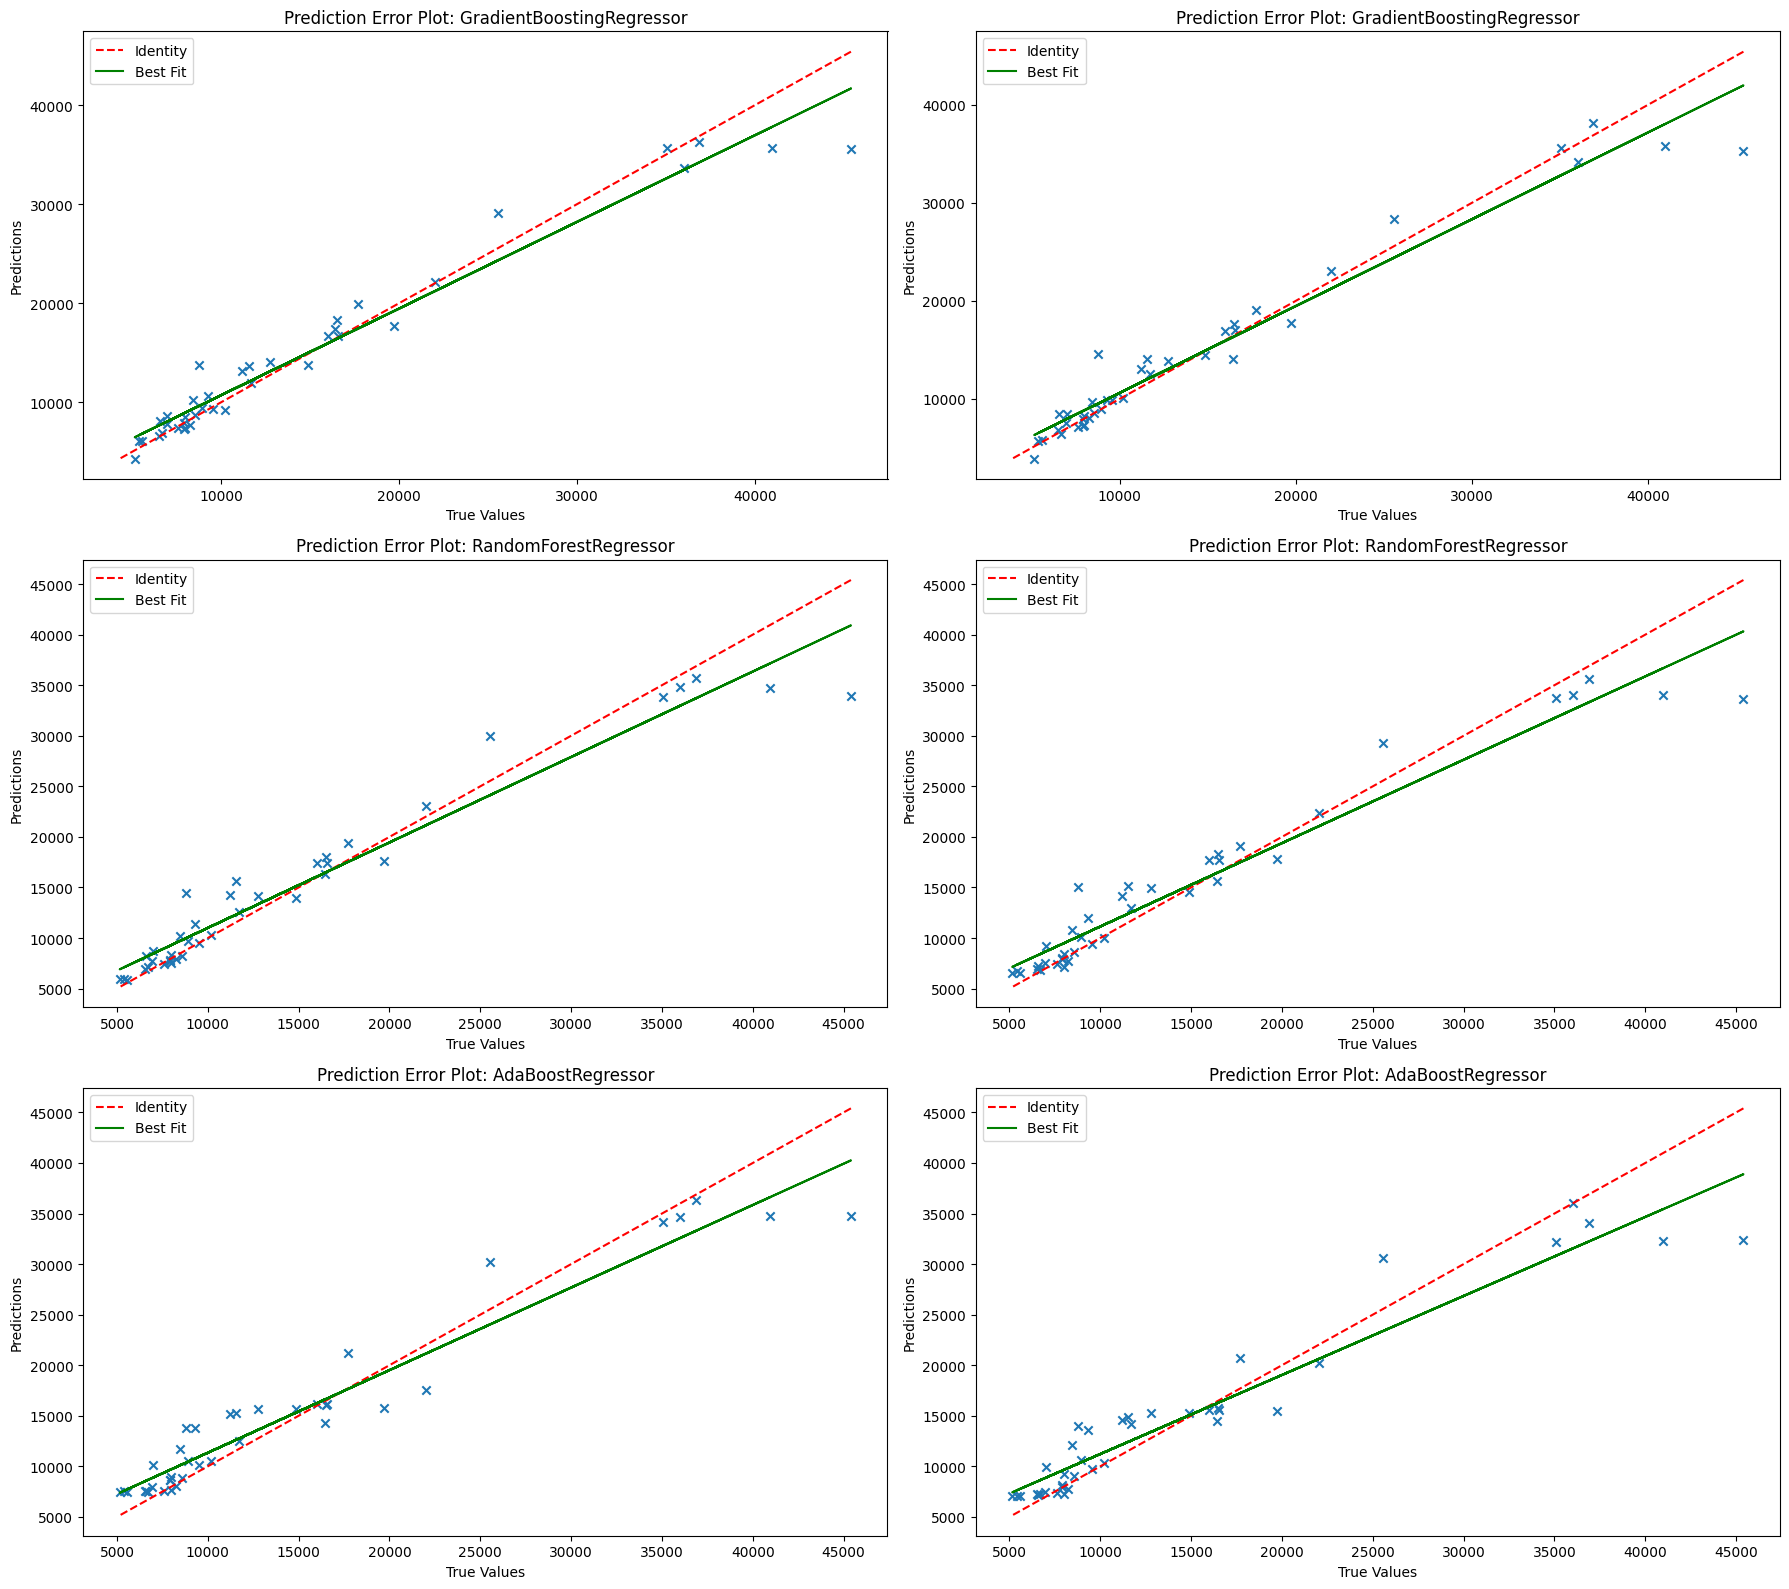

In [56]:
#Prediction Error Plot
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize= (18, 16))

#Untuned
print("Untuned Models")
plot_predictionErrorPlot(gradientBoost_reg, X_test, y_test, ax1)
plot_predictionErrorPlot(randomForest_reg, X_test, y_test, ax3)
plot_predictionErrorPlot(adaBoost_reg, X_test, y_test, ax5)
print()

#Tuned
print("Tuned Models")
plot_predictionErrorPlot(tuned_gradientBoost_reg, X_test, y_test, ax2)
plot_predictionErrorPlot(tuned_random_forest_reg, X_test, y_test, ax4)
plot_predictionErrorPlot(tuned_adaBoost_reg, X_test, y_test, ax6)

plt.tight_layout()
plt.show()

**Observations**
- All regression models Best Fit line is slightly below the Identity line which shows that the model follows the trend of the car prices at a strong positive linear rate.
- Gradient Boosting best fit line is way closer to the Identity line compared to the other 2 models after tuning.
- Further supported by their R2 scores that are above 0.80.

#### Residual Plot

In [57]:
def plot_residual_plot(model, X, y, ax=None):
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
    y_pred = model.predict(X)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 15))
    residual = y - y_pred
    ax.scatter(range(len(residual)), residual, alpha=0.3)
    ax.set_xlabel("Data Point")
    ax.set_ylabel("Residual")
    ax.set_title(f"Residual Plot: {model_name}")
    return ax

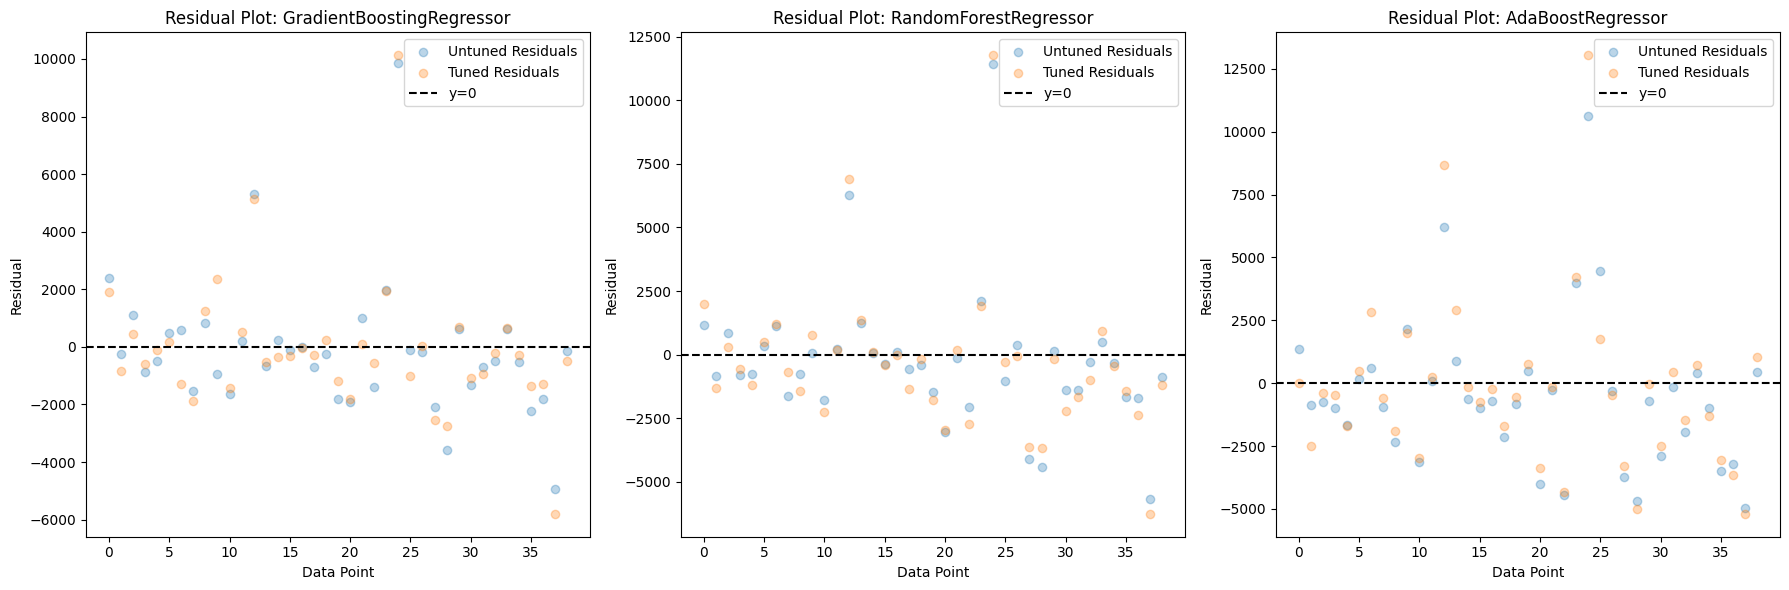

In [58]:
#Residual Plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
plot_residual_plot(gradientBoost_reg, X_test, y_test,ax=ax1)
plot_residual_plot(tuned_gradientBoost_reg, X_test, y_test,ax=ax1)
plot_residual_plot(randomForest_reg, X_test, y_test,ax=ax2)
plot_residual_plot(tuned_random_forest_reg, X_test, y_test,ax=ax2)
plot_residual_plot(adaBoost_reg, X_test, y_test,ax=ax3)
plot_residual_plot(tuned_adaBoost_reg, X_test, y_test,ax=ax3)
ax1.axhline(y=0, linestyle="--", color='black')
ax2.axhline(y=0, linestyle="--", color='black')
ax3.axhline(y=0, linestyle="--", color='black')

ax1.legend(["Untuned Residuals", "Tuned Residuals", "y=0"],loc="best")
ax2.legend(["Untuned Residuals", "Tuned Residuals", "y=0"],loc="best")
ax3.legend(["Untuned Residuals", "Tuned Residuals", "y=0"],loc="best")
plt.tight_layout()
plt.show()

**Observations:**
- The data points in AdaBoost can be seen spreading further away from x=0 compared to the other 2 models which show that the difference between the actual and predicted data is much greater than the other 3 models.
- Can see that there is a data point that is higher than 12500 and a lot more data points below the -5000 point whereas the other 2 models do not have as much across those residuals points.

In [59]:
#Show the RMSE & R2 values of test data

pd.DataFrame([[
    mean_squared_error(y_test, gradientBoosting_pred, squared=False),
    mean_squared_error(y_test, random_forest_pred, squared=False),
    mean_squared_error(y_test, adaBoost_pred, squared=False)],
    [r2_score(y_test, gradientBoosting_pred),
     r2_score(y_test, random_forest_pred),
     r2_score(y_test, adaBoost_pred)]],
    columns=["GradientBoostingRegressor", "RandomForestRegressor", "AdaBoost Regressor"],
    index=["Root Mean Squared Error","R2"],
)

,GradientBoostingRegressor,RandomForestRegressor,AdaBoost Regressor
Root Mean Squared Error,2338.379209,2843.941613,3365.450673
R2,0.950602,0.926933,0.897679


<b>Observations:</b><br>
- Based on the root mean squared error, GradientBoostingRegressor has the lowest value which implies smaller prediction errors and better performance of the model in capturing the variability of the data.
- Based on the R2 value, GradientBoostingRegressor has the best r2 values which implies that it has the best performance at predicting the test results.

### <u>Export the Model</u>

In [60]:
# save the model to disk using pickle
with open('../application/static/carPrice_GBModel.pkl', 'wb') as f: 
    pickle.dump(tuned_gradientBoost_reg, f)

### Feature Importance
- Find out which features the model considers important using Gradient Boosting as it is an ensemble model

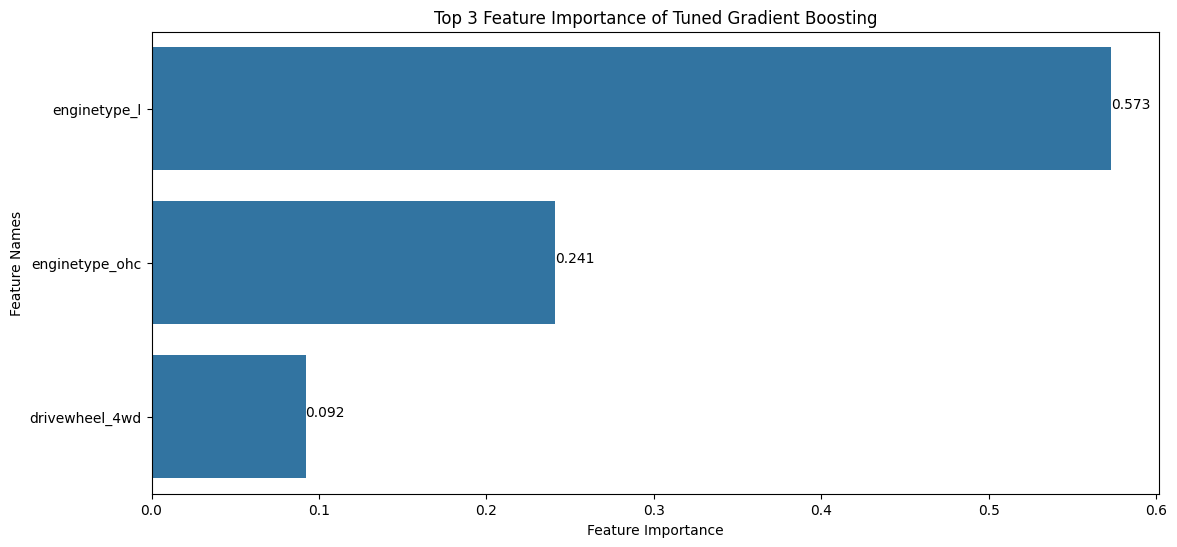

In [61]:
feature_names=['fueleconomy','carlength','carwidth','curbweight','cylindernumber', 'carsprice_range','enginesize','boreratio','horsepower',
               	'wheelbase', 'aspiration_std',	'aspiration_turbo',	'carbody_convertible','carbody_hardtop', 'carbody_hatchback',
                'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',	'drivewheel_fwd', 'drivewheel_rwd',	'enginetype_dohc',	'enginetype_l',
                'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv','enginetype_rotor']

# Create feature importance and sort the features based on the coefficient
importance = pd.Series(
tuned_gradientBoost_reg[-1].feature_importances_, index=feature_names
).sort_values(ascending=False)
top3_importance = importance[:3]
fig, ax = plt.subplots(figsize=(13, 6))
sns.barplot(
    x=top3_importance.values, y=top3_importance.index, ax=ax
)
ax.set_title("Top 3 Feature Importance of Tuned {}".format("Gradient Boosting"))

for i, v in zip(np.arange(0, len(top3_importance)), top3_importance.values):
        ax.text(x=v, y=i, s=round(v, 3))

ax.set_xlabel("Feature Importance")
ax.set_ylabel("Feature Names")
plt.show()

**Observations**
- Top 3 columns that contributed to the price of the car: All are enginetype:
    - L-Type Engine - Represents a longitudinally mounted engine, where the engine is aligned with the length of the vehicle.
    - Overhead Camshaft - Have a single overhead camshaft located in the cylinder head, directly actuating the valves. This design is widely used in modern engines for its efficiency and compactness.
    - Four Wheel Drive - System in a vehicle that powers all 4 wheels simultaneously, quite commonly used for vehicles that drive offroad, designed for driving on challenging terrains and adverse driving conditions.

# 6) Summary
Gradient Boosting Regressor is the best model based on the r2 score of the current data we have now. The top 3 features that are important to the model are the engine types (L-Type, Overhead Camshaft, Overhead Valve Camshift)